# Proyecto Final

> ## Temática: Causas de muerte en Argentina y en el mundo

* 1. Motivación y audiencia
* 2. Objetivo
* 3. Preguntas e hipótesis
* 4. Contexto analítico
* 5. Análisis Exploratorio de Datos (EDA)
* 6. Recomendaciones Preliminares a partir del EDA
* 7. Evaluando modelos de Machine Learning
* 8. Overfitting o Underfitting
* 9. Respondiendo preguntas con la muestra completa (mundial)
* 10. Entrenando los modelos con los datos del mundo
* 11. Google Trends API
* 12. Buscando predecir la evolución futura de Neoplasms y Cardiovascular Diseases
* 13. Optimización y selección de modelos
* 14. Conclusiones

[-> GitHub Repository](https://github.com/santiago-giordano/datascienceproject "Link al repositorio de GitHub!")


## 1. Motivación y audiencia

El estudio de la Salud Pública es uno de los temas que nos interesaba investigar. En la búsqueda de datasets relacionados con este área encontramos varios posibles conjuntos de datos que en general trataban sobre diversos aspectos ligados a la salud en el mundo. Sin embargo, en muchos casos, al observar más detenidamente el contenido de dichos datasets encontrabamos diversos problemas, sea por el tamaño de la muestra, la falta de claridad en las variables, la cantidad de celdas nulas (sin datos), entre otros inconvenientes. En el caso del dataset elegido, contamos con una muestra interesante, que abarca no sólo a todos los países sino que además con datos anuales cubriendo un período de 30 años. Por otro lado, los valores de las variables son fácilmente interpretables, en tanto refieren a cantidades (números enteros). De esta forma podemos, por ejemplo, preguntarnos: ¿Cuántas personas fallecieron en Afghanistan en el año 1993 por Malaria? Siendo la respuesta "108". Son datos simples, pero cuando los análizamos en su evolución a los largo de 30 años, comparando las variables entre sí, y en relación a otros países, o a los valores mundiales, cobran un interés significativo.

Respecto a quiénes podrían estar dirigidos los insights obtenidos de este análisis, consideramos que la audiencia principal podría tratarse de organizaciones gubernamentales, ya que son éstas las dedicadas a la promoción y la prevención en el ámbito de la salud, y serían éstas las que podrían utilizar esta información para tomar decisiones sobre cómo abordar problemas de salud a nivel local, provincial o nacional.

## 2. Objetivo

El objetivo de este análisis podría ser el de comprender mejor las tendencias y patrones en las causas de muerte a nivel global y cómo estos pueden variar entre diferentes grupos, sean países, continentes o segmentos geo-políticos específicos. Se podrían responder preguntas sobre las causas de muerte más comunes, cómo han cambiado a lo largo del tiempo, y cómo pueden variar dependiendo del recorte poblacional que hagamos. 

Teniendo en cuenta la audiencia a la que irían dirigidos nuestros resultados, el objetivo también podría ser el de utilizar los datos para identificar prioridades y objetivos de salud pública, a fin de que las organizaciones gubernamentales puedan tomar medidas efectivas para mejorar la salud y prevenir enfermedades u otros factores de riesgo.

## 3. Preguntas e hipótesis

En este dataset encontramos el número de muertes a nivel mundial, dividido por causa, por país y por año, desde el 1990 hasta el 2019. Se trata de diversas causas de muerte, que en principio no tendrían relación, ya que van desde aspectos psico-sociales hasta aspectos hereditarios o accidentales, aunque bajo un análisis más detenido podrían develar correlaciones.
Resultaría interesante hacer dos tipos de análisis, por un lado, a nivel mundial, cómo fluctúan los datos, buscando indicadores significativos; por otro lado, analizar los datos agrupando países según algún criterio, como por ejemplo "países de América del Sur", o tomar algún país en particular, como por ejemplo Argentina, y analizar sus cambios a través del tiempo, qué particularidades se destacan, y buscar correlaciones en los datos.
Además, pordíamos hipotetizar que algunas de las "causas" relacionadas a niveles de desarrollo de los países, como por ejemplo la muerte por malaria o por deficiencias nutricionales, podrían mostrar una correlación negativa con algunas variables como la muerte por enfermedades ligadas a la edad avanzada, como el Alzheimer.  En este sentido, sería interesante buscar entre todas las variables tanto las correlaciones positivas como las negativas.
En resumen:
* ¿Cuáles son los indicadores más significativos?
* ¿Qué correlaciones se observan, tanto positivas como negativas?
* ¿Qué cambios se observan en la distribución a lo largo de los años?
* ¿Se observa algún punto de quiebre en la distribución temporal?
* A partir de los casi 30 años de la muestra, ¿qué se podría predecir sobre la evolución de las variables a futuro?
* Interesa evaluar el comportamiento de variables ligadas a aspectos psico-sociales (interpersonal violence, self-harm, drug use disorders), así como variables ligadas a lo accidental (road injuries, drownings).
* En terminos generales interesa agrupar todas las variables según su "tipo", para evaluar resultados generales y correlaciones, para luego comparar los resultados por "tipo".

En cuanto a las posibles hipótesis:
* Habrá a lo largo de los años un descenso de las muertes ligadas al subdesarrollo de los países, como por ejemplo, la muerte por malaria o por deficiencias nutricionales.
* Habrá a lo largo de los años un aumento de las muertes por neoplasma (tumores) y por enfermedades ligadas a la edad avanzada (Alzheimer), así como también en las variables ligadas a aspectos psico-sociales (autolesión). 
* Es decir, habrá una correlación negativa entre las variables ligadas a niveles de desarrollo de los países, y variables ligadas a la edad avanzada o a aspectos psico-sociales.

## 4. Contexto analítico

> ### Dataset: "Cause of Deaths around the World (Historical Data)"
> #### [Este Dataset contiene datos históricos sobre causas de muertes en el mundo]
> #### Fuente: https://www.kaggle.com/datasets/iamsouravbanerjee/cause-of-deaths-around-the-world

In [2]:
# Se importan las librerías

import os
import logging
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import pytrends
from pytrends.request import TrendReq
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from lightgbm import LGBMRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import Lasso, Ridge  
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error,mean_absolute_percentage_error
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score
from sklearn import linear_model, tree, ensemble

# Se configura el log
logging.basicConfig(
    filename="../logs/logging.log",
    filemode="w",
    format="%(asctime)s - %(message)s",
    datefmt="%d-%b-%y %H:%M:%S",
    level=logging.INFO,
)
logging.info("Comienzo del log!")

# Se importa el dataset
try:
    df = pd.read_csv('https://raw.githubusercontent.com/santiago-giordano/datascienceproject/main/datasets/cause_of_deaths.csv')
    logging.info("Dataframe creation - Successful!!")
except Exception as e:
    logging.exception("Exception occurred", exc_info=True)

In [3]:
df.head()

,Country/Territory,Code,Year,Meningitis,Alzheimer's Disease and Other Dementias,Parkinson's Disease,Nutritional Deficiencies,Malaria,Drowning,Interpersonal Violence,...,Diabetes Mellitus,Chronic Kidney Disease,Poisonings,Protein-Energy Malnutrition,Road Injuries,Chronic Respiratory Diseases,Cirrhosis and Other Chronic Liver Diseases,Digestive Diseases,"Fire, Heat, and Hot Substances",Acute Hepatitis
0,Afghanistan,AFG,1990,2159,1116,371,2087,93,1370,1538,...,2108,3709,338,2054,4154,5945,2673,5005,323,2985
1,Afghanistan,AFG,1991,2218,1136,374,2153,189,1391,2001,...,2120,3724,351,2119,4472,6050,2728,5120,332,3092
2,Afghanistan,AFG,1992,2475,1162,378,2441,239,1514,2299,...,2153,3776,386,2404,5106,6223,2830,5335,360,3325
3,Afghanistan,AFG,1993,2812,1187,384,2837,108,1687,2589,...,2195,3862,425,2797,5681,6445,2943,5568,396,3601
4,Afghanistan,AFG,1994,3027,1211,391,3081,211,1809,2849,...,2231,3932,451,3038,6001,6664,3027,5739,420,3816


In [4]:
# Se seleccionan datos de America del Sur
df.reset_index(inplace=True)
stringlist = ['ARG', 'BOL', 'BRA', 'CHL', 'COL', 'ECU', 'GUY', 'PRY', 'PER', 'SUR', 'URY', 'VEN']
df_ads = df[df['Code'].str.contains('|'.join(stringlist))]
df_ads = df_ads.set_index("Code")
df_ads.head()

,index,Country/Territory,Year,Meningitis,Alzheimer's Disease and Other Dementias,Parkinson's Disease,Nutritional Deficiencies,Malaria,Drowning,Interpersonal Violence,...,Diabetes Mellitus,Chronic Kidney Disease,Poisonings,Protein-Energy Malnutrition,Road Injuries,Chronic Respiratory Diseases,Cirrhosis and Other Chronic Liver Diseases,Digestive Diseases,"Fire, Heat, and Hot Substances",Acute Hepatitis
Code,,,,,,,,,,,,,,,,,,,,,
ARG,210,Argentina,1990,772,4983,1494,1323,9,1128,2024,...,7096,7129,308,1277,4361,9894,5943,12140,627,107
ARG,211,Argentina,1991,757,5161,1526,1323,9,1120,2007,...,7345,7261,305,1275,4502,10211,5895,12062,645,108
ARG,212,Argentina,1992,732,5383,1594,1322,8,1108,2105,...,7741,7575,300,1272,4679,10766,5961,12201,667,105
ARG,213,Argentina,1993,731,5609,1644,1303,8,1070,2123,...,8026,7788,293,1252,4843,11182,5859,12109,678,103
ARG,214,Argentina,1994,698,5843,1670,1297,8,1047,2226,...,8190,7939,287,1246,4989,11440,5758,11961,682,104


> En este dataset encontramos diversas causas de muerte, que en principio no tendrían relación, ya que van desde aspectos psico-sociales hasta aspectos hereditarios o accidentales.
> Una posibilidad interesante sería analizar los datos agrupando países según algún criterio, como por ejemplo "países de América del Sur", como en la tabla presentada, y a su vez analizar los cambios a través del tiempo.

> Por otro lado, algunas de las "causas" podrían pensarse relacionadas a niveles de desarrollo de los países, como por ejemplo la muerte por malaria. Sería interesante buscar correlaciones entre su descenso/aumento y el descenso/aumento de otras causas.

* En principio, dentro de los posibles recortes, seleccionaremos los datos de Argentina:

In [5]:
df_ads.reset_index(inplace=True)

In [6]:
# Se seleccionan datos de Argentina
stringlist = ["ARG"]
df_arg = df_ads[df_ads["Code"].str.contains("|".join(stringlist))]
df_arg = df_arg.drop(columns=["Country/Territory", "index", "Code"])
df_arg

,Year,Meningitis,Alzheimer's Disease and Other Dementias,Parkinson's Disease,Nutritional Deficiencies,Malaria,Drowning,Interpersonal Violence,Maternal Disorders,HIV/AIDS,...,Diabetes Mellitus,Chronic Kidney Disease,Poisonings,Protein-Energy Malnutrition,Road Injuries,Chronic Respiratory Diseases,Cirrhosis and Other Chronic Liver Diseases,Digestive Diseases,"Fire, Heat, and Hot Substances",Acute Hepatitis
0,1990,772,4983,1494,1323,9,1128,2024,448,559,...,7096,7129,308,1277,4361,9894,5943,12140,627,107
1,1991,757,5161,1526,1323,9,1120,2007,433,670,...,7345,7261,305,1275,4502,10211,5895,12062,645,108
2,1992,732,5383,1594,1322,8,1108,2105,418,909,...,7741,7575,300,1272,4679,10766,5961,12201,667,105
3,1993,731,5609,1644,1303,8,1070,2123,406,1003,...,8026,7788,293,1252,4843,11182,5859,12109,678,103
4,1994,698,5843,1670,1297,8,1047,2226,372,1328,...,8190,7939,287,1246,4989,11440,5758,11961,682,104
5,1995,698,6142,1748,1369,7,1015,2173,388,1635,...,8479,8372,286,1314,5082,12171,5806,12112,699,100
6,1996,693,6439,1818,1452,7,1022,2276,408,1867,...,8693,8856,287,1392,5241,12775,5921,12313,727,93
7,1997,639,6749,1910,1585,7,1006,2179,396,2049,...,9013,9620,287,1519,5383,13514,6021,12466,744,76
8,1998,638,7058,2013,1712,7,998,2055,404,1907,...,9456,10446,277,1635,5537,14362,6085,12660,747,66
9,1999,616,7319,2082,1791,6,973,2169,423,1767,...,9837,11112,280,1703,5556,14948,6100,12796,754,60


## 5. Análisis Exploratorio de Datos (EDA)

> ### A. Buscando correlaciones en Argentina

In [7]:
pd.options.display.max_columns = None
df_arg.corr()

,Year,Meningitis,Alzheimer's Disease and Other Dementias,Parkinson's Disease,Nutritional Deficiencies,Malaria,Drowning,Interpersonal Violence,Maternal Disorders,HIV/AIDS,Drug Use Disorders,Tuberculosis,Cardiovascular Diseases,Lower Respiratory Infections,Neonatal Disorders,Alcohol Use Disorders,Self-harm,Exposure to Forces of Nature,Diarrheal Diseases,Environmental Heat and Cold Exposure,Neoplasms,Conflict and Terrorism,Diabetes Mellitus,Chronic Kidney Disease,Poisonings,Protein-Energy Malnutrition,Road Injuries,Chronic Respiratory Diseases,Cirrhosis and Other Chronic Liver Diseases,Digestive Diseases,"Fire, Heat, and Hot Substances",Acute Hepatitis
Year,1.000000,-0.970886,0.996856,0.995278,-0.278188,-0.967047,-0.984001,0.777478,-0.238196,0.570971,0.985297,-0.939635,0.087006,0.994336,-0.981779,-0.854243,0.913487,-0.165643,-0.571144,0.074532,0.988917,-0.708926,0.762738,0.974867,-0.404556,-0.321465,0.950248,0.972700,0.926846,0.952585,-0.026840,-0.903521
Meningitis,-0.970886,1.000000,-0.968824,-0.973670,0.108290,0.925950,0.956067,-0.770781,0.217263,-0.678223,-0.953491,0.961321,0.020163,-0.965807,0.984521,0.807902,-0.962057,0.074651,0.635387,-0.229187,-0.972423,0.802646,-0.836207,-0.982063,0.463271,0.153246,-0.943765,-0.981183,-0.850434,-0.886817,-0.094805,0.943327
Alzheimer's Disease and Other Dementias,0.996856,-0.968824,1.000000,0.991095,-0.292150,-0.977692,-0.987049,0.781000,-0.228604,0.566274,0.983216,-0.943313,0.057046,0.996610,-0.977394,-0.871324,0.912965,-0.142684,-0.568147,0.072228,0.979083,-0.711317,0.736034,0.971879,-0.378989,-0.335356,0.964406,0.969456,0.919266,0.945210,-0.017815,-0.910692
Parkinson's Disease,0.995278,-0.973670,0.991095,1.000000,-0.226165,-0.959446,-0.968832,0.788059,-0.253855,0.601139,0.989113,-0.932927,0.128430,0.990741,-0.980206,-0.829690,0.929355,-0.155492,-0.548066,0.103958,0.995498,-0.730579,0.802185,0.980899,-0.458438,-0.270531,0.943261,0.981592,0.929740,0.955501,-0.000934,-0.906465
Nutritional Deficiencies,-0.278188,0.108290,-0.292150,-0.226165,1.000000,0.355696,0.281721,-0.276171,0.469762,0.369010,-0.316999,0.039879,-0.371455,-0.277920,0.159146,0.330507,0.088390,0.227362,-0.213470,0.669052,-0.168894,-0.346377,0.339833,-0.066867,-0.142825,0.998891,-0.238195,-0.061881,-0.483953,-0.431860,0.602212,-0.071924
Malaria,-0.967047,0.925950,-0.977692,-0.959446,0.355696,1.000000,0.960060,-0.789601,0.288445,-0.506685,-0.960226,0.901697,-0.079366,-0.971228,0.938150,0.872024,-0.864160,0.149744,0.514949,-0.000511,-0.937259,0.652610,-0.661904,-0.928651,0.339364,0.397560,-0.944127,-0.927744,-0.904363,-0.927029,0.050677,0.863483
Drowning,-0.984001,0.956067,-0.987049,-0.968832,0.281721,0.960060,1.000000,-0.705576,0.144039,-0.546943,-0.946882,0.960886,0.051159,-0.986606,0.974320,0.894451,-0.891872,0.159548,0.644100,-0.099424,-0.958773,0.712178,-0.711305,-0.964292,0.281202,0.323813,-0.952800,-0.958087,-0.871702,-0.904905,0.006004,0.921208
Interpersonal Violence,0.777478,-0.770781,0.781000,0.788059,-0.276171,-0.789601,-0.705576,1.000000,-0.449109,0.434258,0.835127,-0.646598,0.312602,0.777094,-0.730913,-0.657072,0.727308,-0.013981,-0.194667,-0.119435,0.761062,-0.457267,0.578388,0.734328,-0.647373,-0.312549,0.713522,0.726971,0.810820,0.817949,-0.251844,-0.620182
Maternal Disorders,-0.238196,0.217263,-0.228604,-0.253855,0.469762,0.288445,0.144039,-0.449109,1.000000,-0.118752,-0.336307,0.024791,-0.567085,-0.204239,0.203832,-0.035956,-0.111509,0.197538,-0.211722,0.316971,-0.223273,-0.048449,-0.121288,-0.108193,0.537839,0.479513,-0.188507,-0.145385,-0.425834,-0.388460,0.246695,-0.058985
HIV/AIDS,0.570971,-0.678223,0.566274,0.601139,0.369010,-0.506685,-0.546943,0.434258,-0.118752,1.000000,0.534757,-0.691697,-0.265197,0.541656,-0.679377,-0.209774,0.795609,-0.050041,-0.703033,0.544984,0.626561,-0.896592,0.821218,0.656120,-0.577405,0.337585,0.665967,0.702066,0.356709,0.405907,0.658057,-0.690668


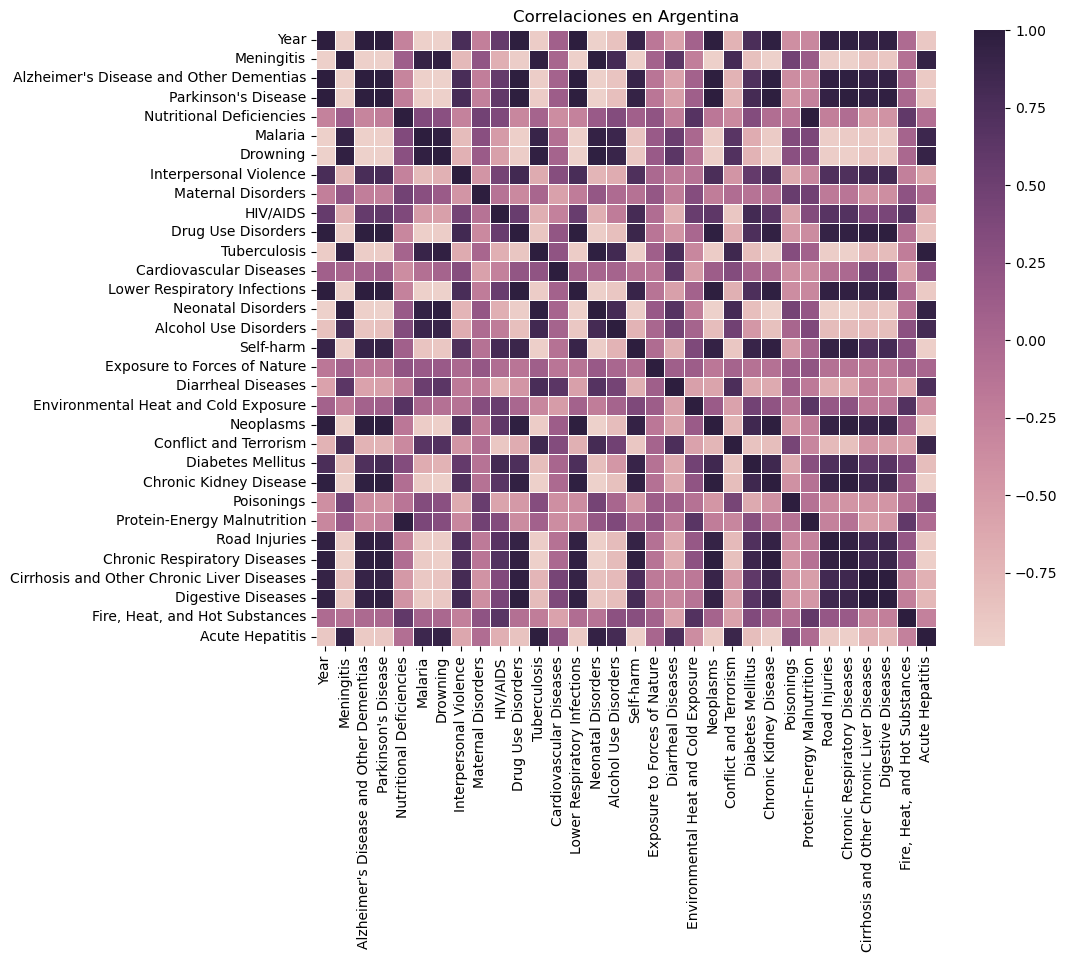

In [8]:
# Feature selection por método de correlación
plt.figure(figsize=(10,8))
sns.heatmap(data=df_arg.corr(), cmap=sns.cubehelix_palette(as_cmap=True), linewidth=.5)
plt.title("Correlaciones en Argentina")
plt.show()

### Evolución de las variables en Argentina a lo largo del tiempo (1990-2019) 
Tal como podemos observar fácilmente en la primera columna de este mapa de calor, hay una serie de variables que han aumentado con los años, otras que han decrecido y otras que muestran valores intermedios.
> Variables que más han aumentado (1 a 0.5):
* Alzheimer's Disease and Other Dementias (0.996856)
* Parkinson's Disease (0.995278)
* Interpersonal Violence (0.777478)
* HIV/AIDS (0.570971)
* Drug Use Disorders (0.985297)
* Lower Respiratory Infections (0.994336)
* Self-harm (0.913487)
* Neoplasms (0.988917)
* Diabetes Mellitus (0.762738)
* Chronic Kidney Disease (0.974867)
* Road Injuries (0.950248)
* Chronic Respiratory Diseases (0.972700)
* Cirrhosis and Other Chronic Liver Diseases (0.926846)
* Digestive Diseases (0.952585)
> Variables que muestran valores intermedios (0.5 a -0.5):
* Nutritional Deficiencies (-0.278188)
* Maternal Disorders (-0.238196)
* Cardiovascular Diseases (0.087006)
* Exposure to Forces of Nature (-0.165643)
* Environmental Heat and Cold Exposure (0.074532)
* Poisonings (-0.404556)
* Protein-Energy Malnutrition (-0.321465)
* Fire, Heat, and Hot Substances (-0.026840)
> Variables que más han decrecido (-0.5 a -1):
* Meningitis (-0.970886)
* Malaria (-0.967047)
* Drowning (-0.984001)
* Tuberculosis (-0.939635)
* Neonatal Disorders (-0.981779)
* Alcohol Use Disorders (-0.854243)
* Diarrheal Diseases (-0.571144)
* Conflict and Terrorism (-0.708926)
* Acute Hepatitis (-0.903521)

Como primera lectura superficial, observamos que son más las variables que aumentaron que aquellas que decrecieron o mostraron valores intermedios.

In [9]:
df_arg_tempevo = df_arg.corr()

In [10]:
df_arg_tempevo.reset_index(inplace=True)
df_arg_tempevo = df_arg_tempevo[["index", "Year"]]
df_arg_tempevo.rename(columns={"index": "cause_of_death", "Year": "temp_evo"}, inplace=True)
df_arg_tempevo.sort_values(by="temp_evo", ascending=False, inplace=True)
df_arg_tempevo = df_arg_tempevo.drop(df_arg_tempevo.index[0])
df_arg_tempevo

,cause_of_death,temp_evo
2,Alzheimer's Disease and Other Dementias,0.996856
3,Parkinson's Disease,0.995278
13,Lower Respiratory Infections,0.994336
20,Neoplasms,0.988917
10,Drug Use Disorders,0.985297
23,Chronic Kidney Disease,0.974867
27,Chronic Respiratory Diseases,0.972700
29,Digestive Diseases,0.952585
26,Road Injuries,0.950248
28,Cirrhosis and Other Chronic Liver Diseases,0.926846


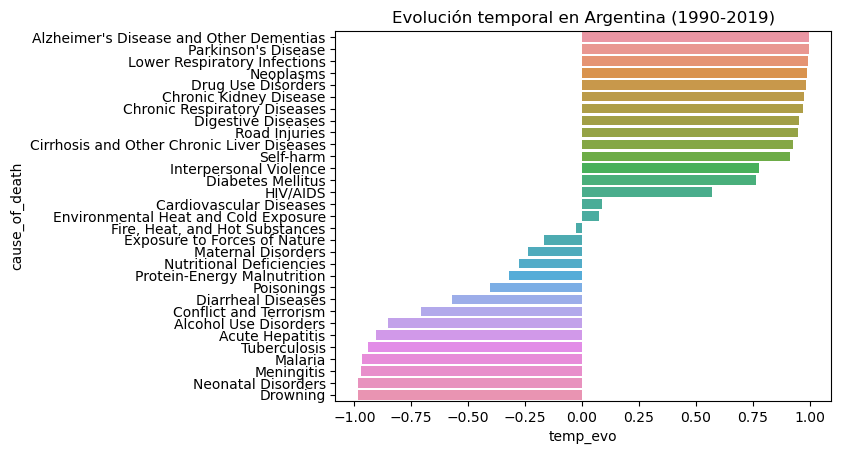

In [11]:
sns.barplot(data=df_arg_tempevo, x="temp_evo", y="cause_of_death")
plt.title('Evolución temporal en Argentina (1990-2019)')
plt.show()

#### Top 5: Evolución temporal

In [12]:
df_arg_tempevo.head()

,cause_of_death,temp_evo
2,Alzheimer's Disease and Other Dementias,0.996856
3,Parkinson's Disease,0.995278
13,Lower Respiratory Infections,0.994336
20,Neoplasms,0.988917
10,Drug Use Disorders,0.985297


> La variable que más ha aumentado a lo largo de los años es: "Alzheimer's Disease and Other Dementias" (Alzheimer's y otras demencias).

#### Bottom 5: Evolución temporal

In [13]:
df_arg_tempevo.tail()

,cause_of_death,temp_evo
11,Tuberculosis,-0.939635
5,Malaria,-0.967047
1,Meningitis,-0.970886
14,Neonatal Disorders,-0.981779
6,Drowning,-0.984001


> La variable que más ha decrecido a lo largo de los años es: "Drowning" (Ahogamientos).

> Por otro lado, de las variables intermedias, las que menos han variado a lo largo de los años son: "Fire, Heat, and Hot Substances" (Fuego, calor y substancias calientes), "Environmental Heat and Cold Exposure" (Exposición a calor o frío ambiental) y "Cardiovascular Diseases" (Enfermedades cardiovasculares).

De estas tres variables, las más "estables" a lo largo del tiempo, resulta particularmente llamativa la tercera, "enfermedades cardiovasculares". Resultaría interesante observar el número de muertes por esta causa, más allá de su "estabilidad".

#### Profundizando sobre "enfermedades cardiovasculares"

In [14]:
df_arg_cv = df_arg[["Year", "Cardiovascular Diseases"]].copy()
df_arg_cv.rename(columns={"Cardiovascular Diseases": "cardio_diseases_arg"}, inplace=True)
df_arg_cv

,Year,cardio_diseases_arg
0,1990,98783
1,1991,97610
2,1992,98286
3,1993,97030
4,1994,94314
5,1995,94708
6,1996,94471
7,1997,94388
8,1998,95359
9,1999,95713


In [15]:
df_arg_sum = df_arg.copy()
df_arg_sum.drop(
    columns=[
        "Year"
        ],
    inplace=True)
df_arg_sum = df_arg_sum.sum()
df_arg_sum = df_arg_sum.to_frame()
df_arg_sum.reset_index(inplace=True)
df_arg_sum.rename(columns={"index": "cause_of_death", 0: "total_sum"}, inplace=True)
df_arg_sum.sort_values(by="total_sum", ascending=False, inplace=True)
df_arg_sum

,cause_of_death,total_sum
11,Cardiovascular Diseases,2836128
19,Neoplasms,2113666
12,Lower Respiratory Infections,697414
26,Chronic Respiratory Diseases,463952
28,Digestive Diseases,422716
22,Chronic Kidney Disease,357513
21,Diabetes Mellitus,278201
1,Alzheimer's Disease and Other Dementias,261721
27,Cirrhosis and Other Chronic Liver Diseases,201480
13,Neonatal Disorders,173947


Como podemos observar en esta tabla, la causa de muerte con mayor número de víctimas es justamente "Cardiovascular Diseases", seguida por "Neoplasms" ("tumores"), con un total de 2,8 y 2,1 millones respectivamente. En tercer lugar, "Lower Respiratory Infections" con un total de 697414, es decir, 1,4 millones por debajo.

> Resulta un dato muy significativo que la variable con mayor número de víctimas sea a la vez una de las tres más "estables" a lo largo del tiempo. Se trata sin dudas de una variable muy interesante, en tanto no sólo se lleva el mayor número de muertes, sino que además su "estabilidad" nos presenta un enigma.
* ¿Qué significado puede tener que el paso del tiempo, los cambios socio-culturales, los desarrollos médicos, etc., no tengan un impacto relevante en el aumento o descenso de esta variable?

> En el caso de la segunda causa, "Neoplasms", vemos un número muy significativo de casos, pero además vimos anteriormente que es una de las variables que más ha aumentado a lo largo de los años. Esto implica un riesgo muy significativo, por varias razones. Por un lado, el número en sí es muy preocupante, pero más aún lo es que al mismo tiempo esté en el puesto número 4 de las variables con mayor evolución "positiva" a lo largo de los años. Esto significa, que de seguir con la misma tendencia, podríamos hipotetizar sin mucha dificultad que va a sobrepasar a las enfermedades cardiovasculares en un corto período de tiempo.
* En este caso, la pregunta sería: ¿por qué hay tantas muertes por tumores y por qué aumentan tanto los casos? (La base de datos no lo especifica, pero podemos suponer que cuando habla de tumores refiere principalmente a tumores malignos, es decir, cancerosos)
* Seguramente estas preguntas no puedan tener respuestas aquí, pero quizás sí podríamos contestar la siguiente: ¿en cuántos años la muerte por tumores cancerosos superará a las muertes por enfermedades cardiovasculares? 
* Por otro lado, ¿estos indicadores se repiten a nivel mundial?

A continuación, el top 5 y bottom 5 de las variables con mayor número de víctimas.

#### Top 5: Suma total

In [16]:
df_arg_sum.head()

,cause_of_death,total_sum
11,Cardiovascular Diseases,2836128
19,Neoplasms,2113666
12,Lower Respiratory Infections,697414
26,Chronic Respiratory Diseases,463952
28,Digestive Diseases,422716


#### Bottom 5: Suma total

In [17]:
df_arg_sum.tail()

,cause_of_death,total_sum
18,Environmental Heat and Cold Exposure,1567
9,Drug Use Disorders,1535
20,Conflict and Terrorism,773
16,Exposure to Forces of Nature,425
4,Malaria,123


#### Comparando Argentina con el promedio mundial

In [18]:
df_cvbyyear = df.pivot_table(index="Year", aggfunc="mean", values="Cardiovascular Diseases")
df_cvbyyear = df_cvbyyear.round(0)
df_cvbyyear.reset_index(inplace=True)
df_cvbyyear.rename(columns={"Cardiovascular Diseases": "cardio_diseases_worldmean"}, inplace=True)
df_cvbyyear = df_cvbyyear.astype("int64")

In [19]:
df_cv = df_cvbyyear.merge(df_arg_cv, on="Year", how="outer")
df_cv.set_index("Year", inplace = True)

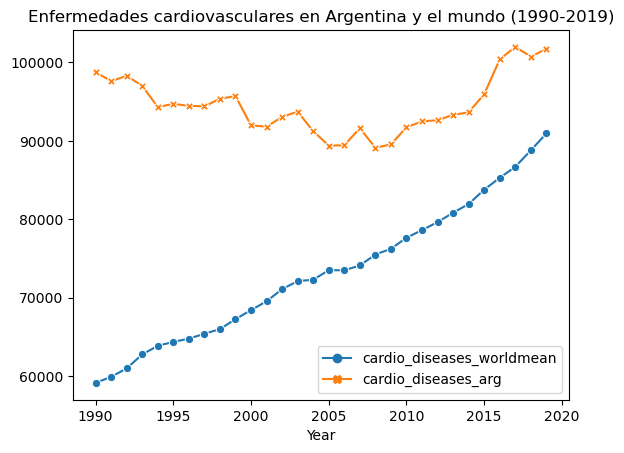

In [20]:
sns.lineplot(data=df_cv, markers=True, dashes=False)
plt.title('Enfermedades cardiovasculares en Argentina y el mundo (1990-2019)')
plt.show()

A nivel mundial podemos observar una pendiente positiva muy marcada, mientras que en Argentina podemos trazar una pendiente negativa desde el año 1990 hasta el año 2008, donde se invierte la tendencia y la pendiente se torna positiva. A pesar de que en un paneo general las distribuciones parecen bastante distintas, si comenzamos a observar las tendencias a partir del año 2008 en ambas distribuciones la pendiente se torna similar, aunque no idéntica. Sería interesante proyectar cómo seguirá esta correlación a futuro.

#### Correlaciones de Enfermedades Cardiovasculares y Tumores

Es interesante notar que, cuando observamos el grado de correlación de las EC con otras variables, no observamos ninguna relación realmente significativa. La mayor correlación se observa con "Diarrheal Diseases" (0.639668).

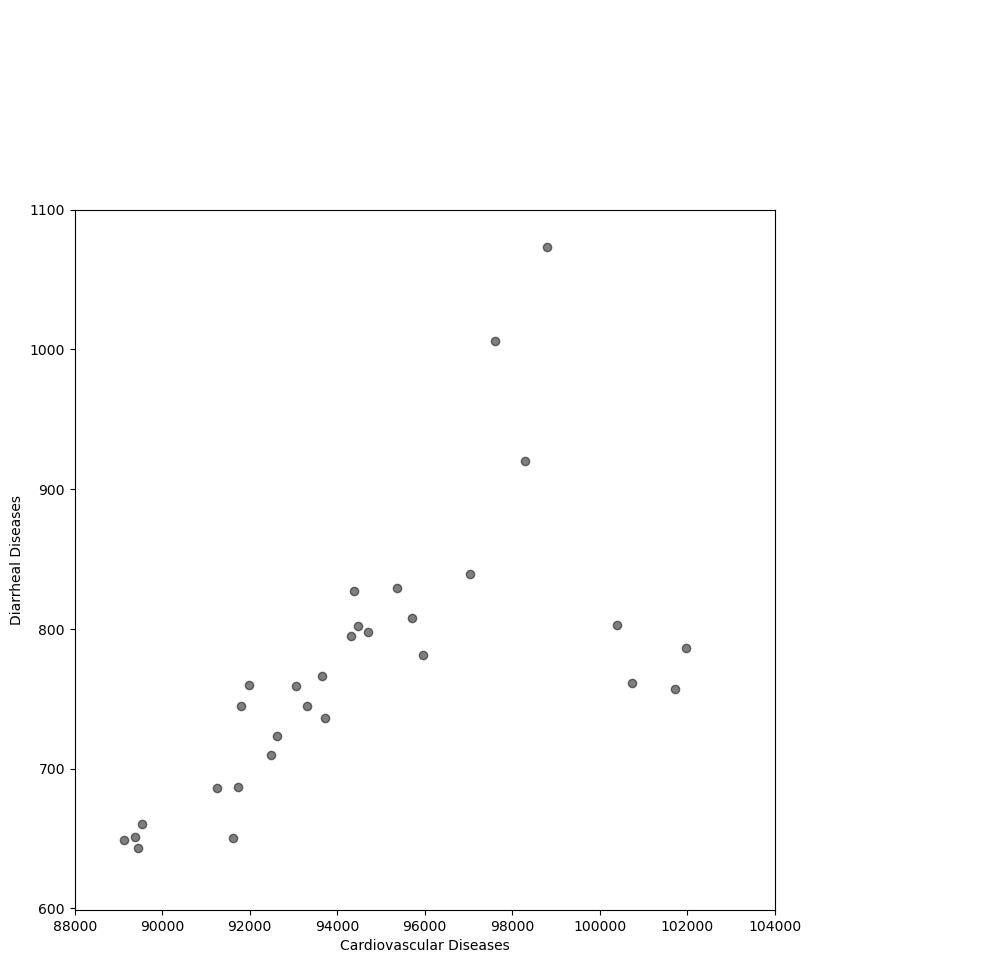

In [21]:
plt.rcParams["figure.figsize"] = (10,10)

x_data = df_arg["Cardiovascular Diseases"]
y_data = df_arg["Diarrheal Diseases"]

left = 0.1
bottom = 0.1
top = 0.8
right = 0.8
main_ax = plt.axes([left,bottom,right-left,top-bottom])
# create axes to the top and right of the main axes and hide them
top_ax = plt.axes([left,top,right - left,1-top])
plt.axis('off')
right_ax = plt.axes([right,bottom,1-right,top-bottom])
plt.axis('off')
main_ax.plot(x_data,  y_data, 'ko', alpha=0.5)
# Save the default tick positions, so we can reset them..

tcksx = main_ax.get_xticks()
tcksy = main_ax.get_yticks()

right_ax.boxplot(x_data, positions=[0], notch=False, widths=1.)
top_ax.boxplot(y_data, positions=[0], vert=False, notch=False, widths=1.)

main_ax.set_yticks(tcksy) # pos = tcksy
main_ax.set_xticks(tcksx) # pos = tcksx
main_ax.set_yticklabels([int(j) for j in tcksy])
main_ax.set_xticklabels([int(j) for j in tcksx])
main_ax.set_ylim([min(tcksy-1),max(tcksy)])
main_ax.set_xlim([min(tcksx-1),max(tcksx)])
main_ax.set_xlabel("Cardiovascular Diseases")
main_ax.set_ylabel("Diarrheal Diseases")

# set the limits to the box axes
top_ax.set_xlim(main_ax.get_xlim())
top_ax.set_ylim(-1,1)
right_ax.set_ylim(main_ax.get_ylim())
right_ax.set_xlim(-1,1)
plt.show()

* Por otro lado, la variable "tumores" registra varias correlaciones positivas, siendo una de las más interesantes la encontrada respecto  a "auto-lesión" (0.938994).

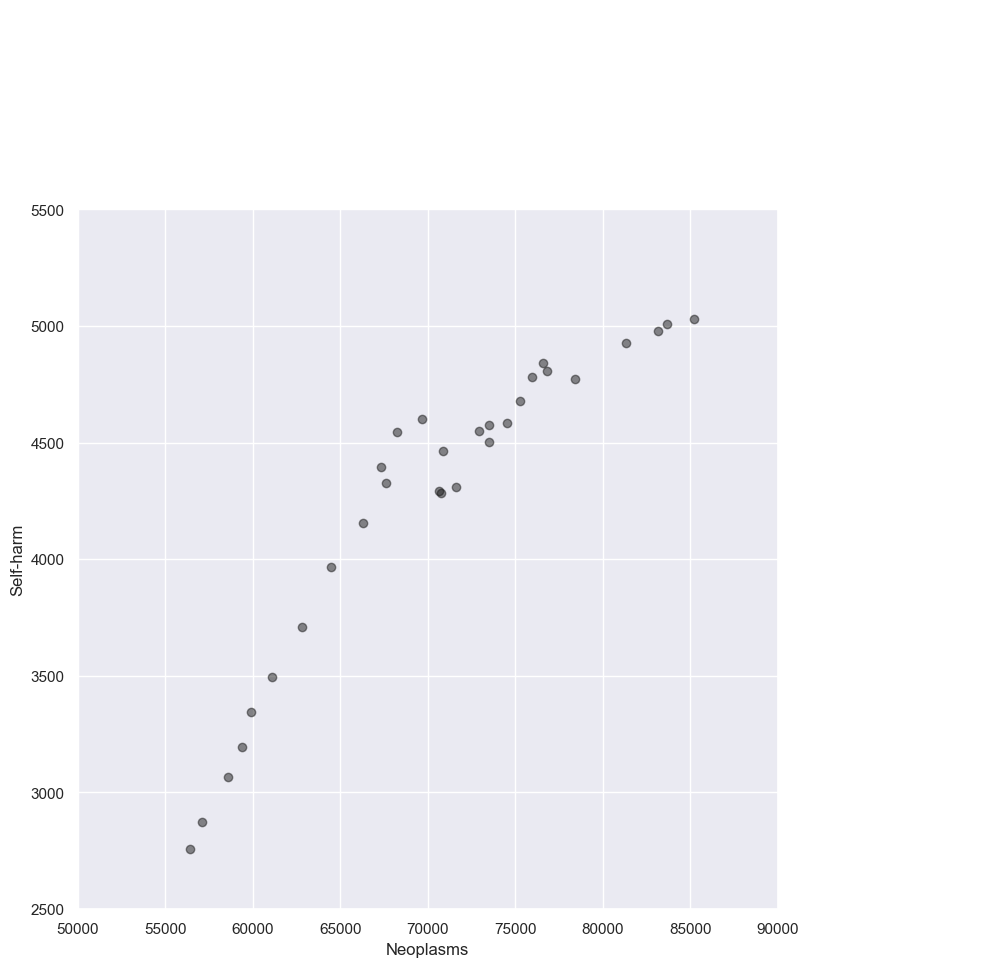

In [22]:
sns.set(font_scale=1)

plt.rcParams["figure.figsize"] = (10,10)

x_data = df_arg["Neoplasms"]
y_data = df_arg["Self-harm"]

left = 0.1
bottom = 0.1
top = 0.8
right = 0.8
main_ax = plt.axes([left,bottom,right-left,top-bottom])
# create axes to the top and right of the main axes and hide them
top_ax = plt.axes([left,top,right - left,1-top])
plt.axis('off')
right_ax = plt.axes([right,bottom,1-right,top-bottom])
plt.axis('off')
main_ax.plot(x_data,  y_data, 'ko', alpha=0.5)
# Save the default tick positions, so we can reset them..

tcksx = main_ax.get_xticks()
tcksy = main_ax.get_yticks()

right_ax.boxplot(x_data, positions=[0], notch=False, widths=1.)
top_ax.boxplot(y_data, positions=[0], vert=False, notch=False, widths=1.)

main_ax.set_yticks(tcksy) # pos = tcksy
main_ax.set_xticks(tcksx) # pos = tcksx
main_ax.set_yticklabels([int(j) for j in tcksy])
main_ax.set_xticklabels([int(j) for j in tcksx])
main_ax.set_ylim([min(tcksy-1),max(tcksy)])
main_ax.set_xlim([min(tcksx-1),max(tcksx)])
main_ax.set_xlabel("Neoplasms")
main_ax.set_ylabel("Self-harm")

# set the limits to the box axes
top_ax.set_xlim(main_ax.get_xlim())
top_ax.set_ylim(-1,1)
right_ax.set_ylim(main_ax.get_ylim())
right_ax.set_xlim(-1,1)
plt.show()

> Se observa una correlación positiva linear entre ambas variables

> Sabemos que correlación no implica causalidad, pero sería interesante investigar si en este caso la correlación a su vez sí revela algún tipo de relación causal o concausal. En relación a esto, primero deberíamos analizar qué otras variables correlacionan con "auto-lesión", y en caso de haber resultados positivos, cuáles son las relaciones más significativas.

#### Correlaciones de Auto-lesión

In [23]:
df_arg_neop = df_arg.corr()

In [24]:
df_arg_neop = df_arg_neop["Self-harm"]
df_arg_neop = df_arg_neop.to_frame()
df_arg_neop.reset_index(inplace=True)
df_arg_neop.rename(columns={"index": "cause_of_death", "Self-harm": "self_harm_arg"}, inplace=True)
df_arg_neop.sort_values(by="self_harm_arg", ascending=False, inplace=True)
df_arg_neop = df_arg_neop.drop(df_arg_neop.index[0])
df_arg_neop = df_arg_neop.drop(df_arg_neop.index[5])
df_arg_neop

,cause_of_death,self_harm_arg
27,Chronic Respiratory Diseases,0.974897
23,Chronic Kidney Disease,0.967034
20,Neoplasms,0.938994
3,Parkinson's Disease,0.929355
26,Road Injuries,0.927895
2,Alzheimer's Disease and Other Dementias,0.912965
13,Lower Respiratory Infections,0.905208
22,Diabetes Mellitus,0.904269
10,Drug Use Disorders,0.890715
9,HIV/AIDS,0.795609


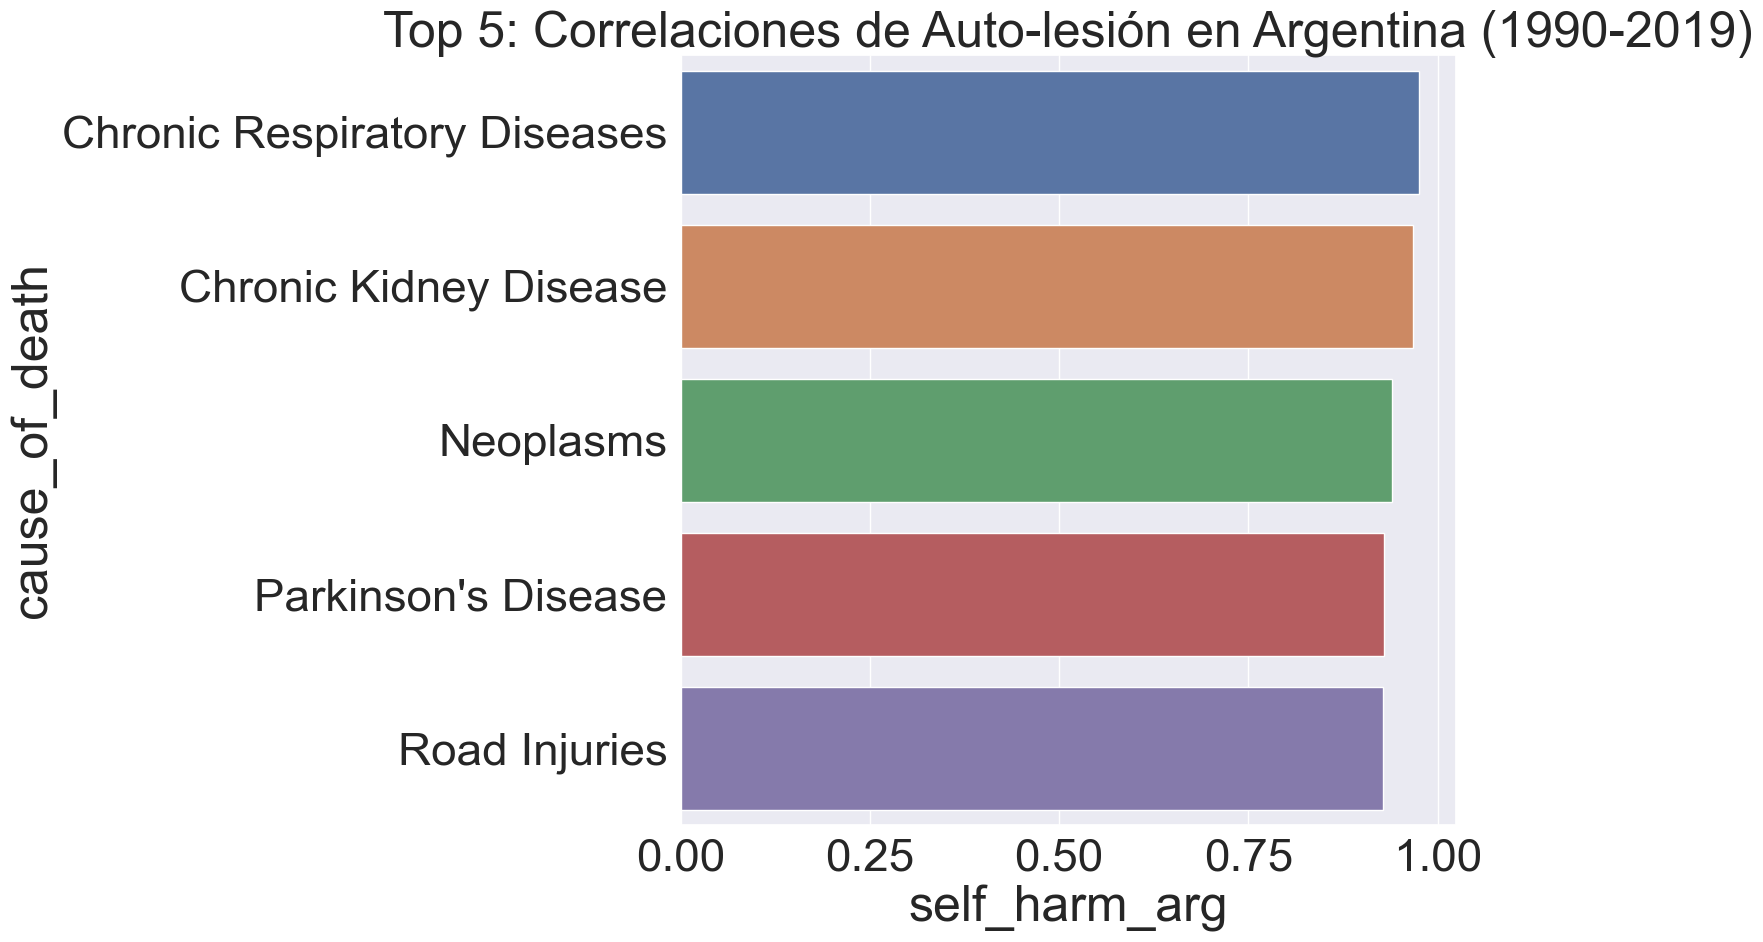

In [25]:
sns.set(font_scale=3)
sns.barplot(data=df_arg_neop.head(5), x="self_harm_arg", y="cause_of_death")
plt.title('Top 5: Correlaciones de Auto-lesión en Argentina (1990-2019)')
plt.show()

> Se observa que la correlación con la variable "tumores" tiene un valor de 0.938994, y se ubica en tercer lugar entre las 10 correlaciones más significativas.

> A su vez observamos correlaciones muy fuertes con diversas variables, siendo las más significativas dos enfermedades crónicas: Enfermedades Respiratorias Crónicas (0.974897) y Enfermedades del Riñon Crónicas (0.967034). En cuarto lugar, la Enfermedad de Parkinson (0.929355), y en quinto, "Lesiones en la Carretera", es decir, Accidentes de Tránsito (0.927895).

## 6. Recomendaciones Preliminares a partir del EDA

Nos encontramos todavía en la fase exploratoria, es decir que nuestro análisis y nuestros insights están aún en fase de trabajo. Sin embargo, podemos resumir algunos datos significativos de Argentina que hemos podido observar hasta el momento, y en base a éstos quizás definir algunas recomendaciones tentativas:
* Las 5 variables que más han aumentado a lo largo del tiempo son: Alzheimer's (y otras demencias), Enfermedad de Parkinson, **Infecciones Respiratorias Bajas**, **Tumores**, Trastornos por Consumo de Drogas.
* Las 5 variables con mayor número de víctimas totales son: **Enfermedades Cardiovasculares**, **Tumores**, **Infecciones Respiratorias Bajas**, Enfermedades Respiratorias Crónicas, Enfermedades Digestivas.
* Las únicas dos variables que se encuentran tanto entre las de mayor evolución como las de mayor número de víctimas son: **Tumores** y **Infecciones Respiratorias Bajas**.
* La variable con mayor número de víctimas, **Enfermedades Cardiovasculares**, es a la vez una de las tres más "estables" a lo largo del tiempo (ni sube ni baja en valores significativos).
* La variable **Auto-lesión** registra varias correlaciones positivas, siendo una de las más interesantes la encontrada respecto a **Tumores** (tercer lugar). 
* La variable **Auto-lesión** también se correlaciona positivamente en primero y segundo lugar con Enfermedades Respiratorias Crónicas y Enfermedades del Riñon Crónicas. En cuarto lugar, la Enfermedad de Parkinson, y en quinto, "Lesiones en la Carretera", es decir, Accidentes de Tránsito.

Tal como hemos resumido, hay ciertas variables que resultan muy significativas, destacando en particular:  **Enfermedades Cardiovasculares**, **Tumores**, **Infecciones Respiratorias Bajas** y **Auto-lesión**. 

Basados en estos insights, consideramos que habría dos recomendaciones principales, las cuales serían:
* La necesidad de destinar fondos para la investigación, la prevención y el tratamiento de los Tumores (Cancerígenos) y las Infecciones Respiratorias Bajas.
* La necesidad de destinar recursos para el seguimiento y tratamiento psicológico de aquellas personas que sufren enfermedades graves y potencialmente terminales y sus familias, en tanto se observa una clara correlación entre el sufrir una de éstas y el padecimiento psíquico consiguiente que puede llevar en muchos casos al suicidio.

## 7. Evaluando modelos de Machine Learning

### Linear Regression Model
* Tal como trabajamos en la parte II, la variable "Neoplasms" (Tumores) es una de las más significativas, por tal razón en principio entrenaremos los modelos con ésta.

In [26]:
# Se entrena el modelo con una variable
x = df_arg['Year'].values.reshape(-1, 1)
y = df_arg['Neoplasms'].values.reshape(-1, 1)

In [27]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [28]:
regressor = LinearRegression()
regressor.fit(X_train, Y_train) #Creates model

LinearRegression()

Text(0.5, 0.98, 'Linear Regression Model')

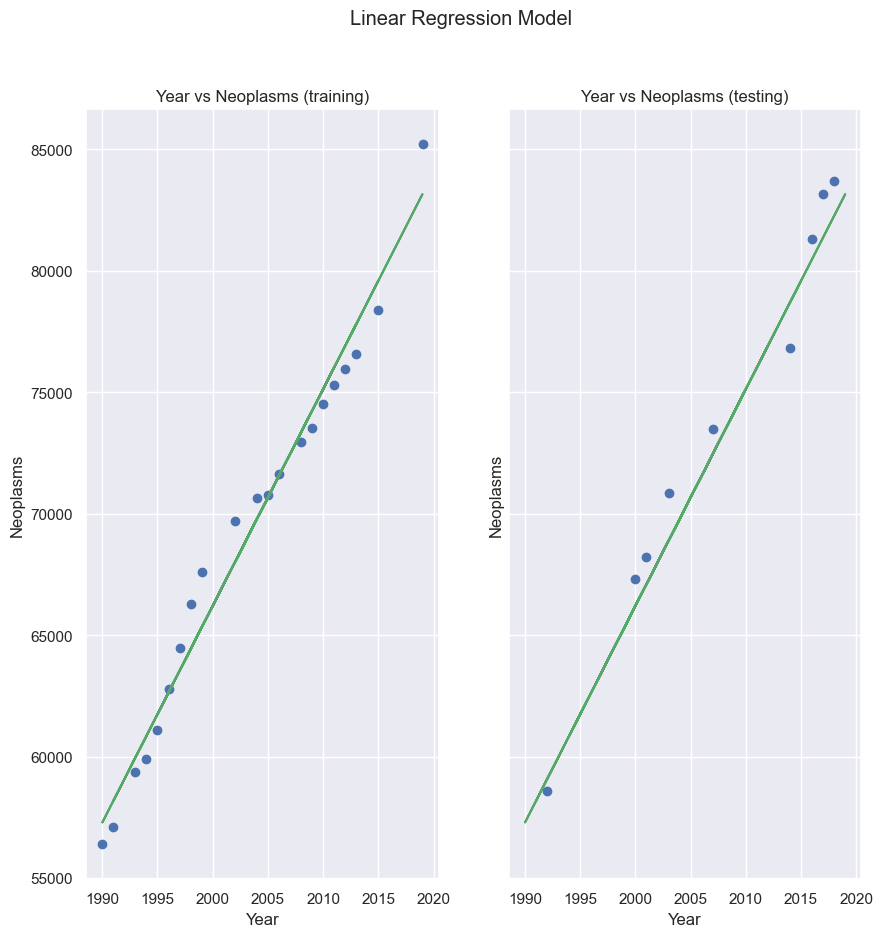

In [29]:
sns.set_theme()
fig, ax = plt.subplots(1, 2, figsize=(10, 10), sharey=True)
ax[0].scatter(X_train, Y_train)
ax[0].plot(X_train, regressor.predict(X_train), c='g')
ax[0].set_title('Year vs Neoplasms (training)')
ax[0].set_xlabel('Year')
ax[0].set_ylabel('Neoplasms')
ax[1].scatter(X_test, Y_test)
ax[1].plot(X_train, regressor.predict(X_train), c='g')
ax[1].set_title('Year vs Neoplasms (testing)')
ax[1].set_xlabel('Year')
ax[1].set_ylabel('Neoplasms')
plt.suptitle('Linear Regression Model')

In [30]:
regressor.score(X_test, Y_test)

0.9698698244118578

Cuanto más cercano a 100% sea este valor, más precisas serán las predicciones.
* En segundo lugar, agregaremos la variable "Lower Respiratory Infections" (Infecciones Respiratorias Bajas) que también se encuentra entre las más significativas.

In [31]:
# En este caso con dos variables
xx = df_arg[['Neoplasms', 'Lower Respiratory Infections']].values
yy = df_arg['Year'].values.reshape(-1, 1)
XX_train, XX_test, YY_train, YY_test = train_test_split(xx, yy, test_size=0.3, random_state=0)
regressor.fit(XX_train, YY_train)
regressor.score(XX_test, YY_test)

0.9894416929951134

### Entrenando varios modelos para compararlos

* A partir de una variable - "Neoplasms" (Tumores) :

In [32]:
# Lista con los regresores
regresores = [ 
    KNeighborsRegressor()
    ,Lasso()
    ,LGBMRegressor(objective='regression', linear_tree=True)
    ,LinearRegression()
    ,MLPRegressor(max_iter=600, random_state=170162)
    ,RandomForestRegressor(criterion='absolute_error', random_state=170162) 
    ,Ridge()
    ,SVR(gamma='auto', kernel='rbf') 
    ,XGBRegressor()
    ]

In [33]:
# Se crea una lista para las métricas
error_metrics=[]

# Se itera sobre la lista de regresores
for regresor in regresores:
    
    # Se entrena el regresor con los conjuntos de training
    regresor.fit(X_train, Y_train)
    print("-------------",type(regresor).__name__,"----------------")
    print("Training score:",regresor.score(X_train,Y_train))
    print("Testing score:",regresor.score(X_test,Y_test))
        
    # Se predice con los valores de XX_test
    y_pred = regresor.predict(X_test)
    
    # Se calcula error
    error_metrics.append( {
                           'Regresor': type(regresor).__name__, 
                           'MAE': np.sqrt(mean_absolute_error((Y_test),(y_pred))),
                           'R2': np.sqrt(r2_score((Y_test),(y_pred))),
                           'MAPE': np.sqrt(mean_absolute_percentage_error((Y_test),(y_pred)))
                          }
                        )

    
# Se convierte la lista de métricas en un dataframe
metrics_df1 = pd.DataFrame.from_dict(error_metrics)
metrics_df1.head()

------------- KNeighborsRegressor ----------------
Training score: 0.9454628598860693
Testing score: 0.8845822698481649
------------- Lasso ----------------
Training score: 0.977585701593548
Testing score: 0.969867850378417
------------- LGBMRegressor ----------------
Training score: 0.0
Testing score: -0.3473937986801985
------------- LinearRegression ----------------
Training score: 0.9775857018501222
Testing score: 0.9698698244118578


C:\Users\giord\anaconda3updated\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\giord\AppData\Local\Temp\ipykernel_19876\2272855213.py:20: RuntimeWarning: invalid value encountered in sqrt
  'R2': np.sqrt(r2_score((Y_test),(y_pred))),
C:\Users\giord\anaconda3updated\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1617: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\giord\anaconda3updated\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\giord\AppData\Local\T

------------- MLPRegressor ----------------
Training score: -1.2369942328521284
Testing score: -2.6766676992760985
------------- RandomForestRegressor ----------------
Training score: 0.9897541317481056
Testing score: 0.9554111061550501
------------- Ridge ----------------
Training score: 0.9775852395927911
Testing score: 0.9697854825834425
------------- SVR ----------------
Training score: -0.04503934258451703
Testing score: -0.14988667039480053
------------- XGBRegressor ----------------
Training score: 0.9999999995132144
Testing score: 0.9633573081262747


C:\Users\giord\anaconda3updated\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\giord\AppData\Local\Temp\ipykernel_19876\2272855213.py:20: RuntimeWarning: invalid value encountered in sqrt
  'R2': np.sqrt(r2_score((Y_test),(y_pred))),


,Regresor,MAE,R2,MAPE
0,KNeighborsRegressor,43.910515,0.940522,0.155684
1,Lasso,35.882452,0.984819,0.131478
2,LGBMRegressor,86.903157,NaN,0.315853
3,LinearRegression,35.881556,0.984820,0.131475
4,MLPRegressor,115.922071,NaN,0.416885


<Axes: title={'center': 'Comparación de regresores (MAE)'}, xlabel='Regresor'>

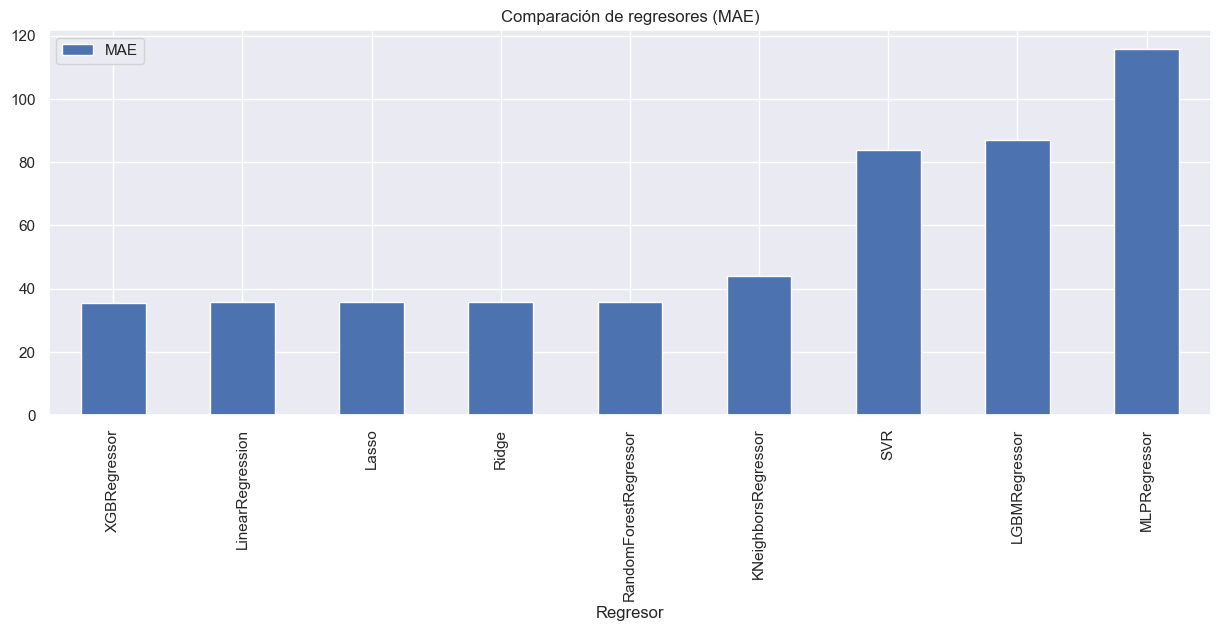

In [34]:
metrics_df1.sort_values('MAE')[['Regresor', 'MAE']].plot(figsize=(15,5)
                                                                       ,grid=True
                                                                       ,kind='bar'
                                                                       ,x='Regresor'
                                                                       ,title='Comparación de regresores (MAE)',
)

<Axes: title={'center': 'Comparación de regresores (MAPE)'}, xlabel='Regresor'>

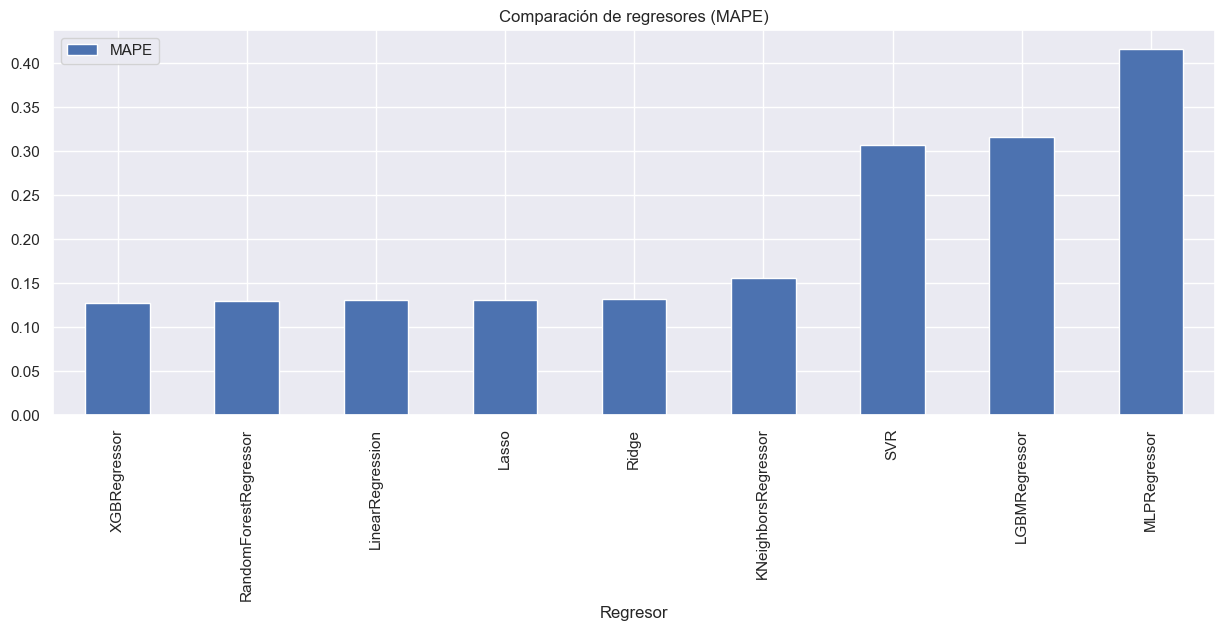

In [35]:
metrics_df1.sort_values('MAPE')[['Regresor', 'MAPE']].plot(figsize=(15,5)
                                                                       ,grid=True
                                                                       ,kind='bar'
                                                                       ,x='Regresor'
                                                                       ,title='Comparación de regresores (MAPE)',
)

<Axes: title={'center': 'Comparación de regresores (R2)'}, xlabel='Regresor'>

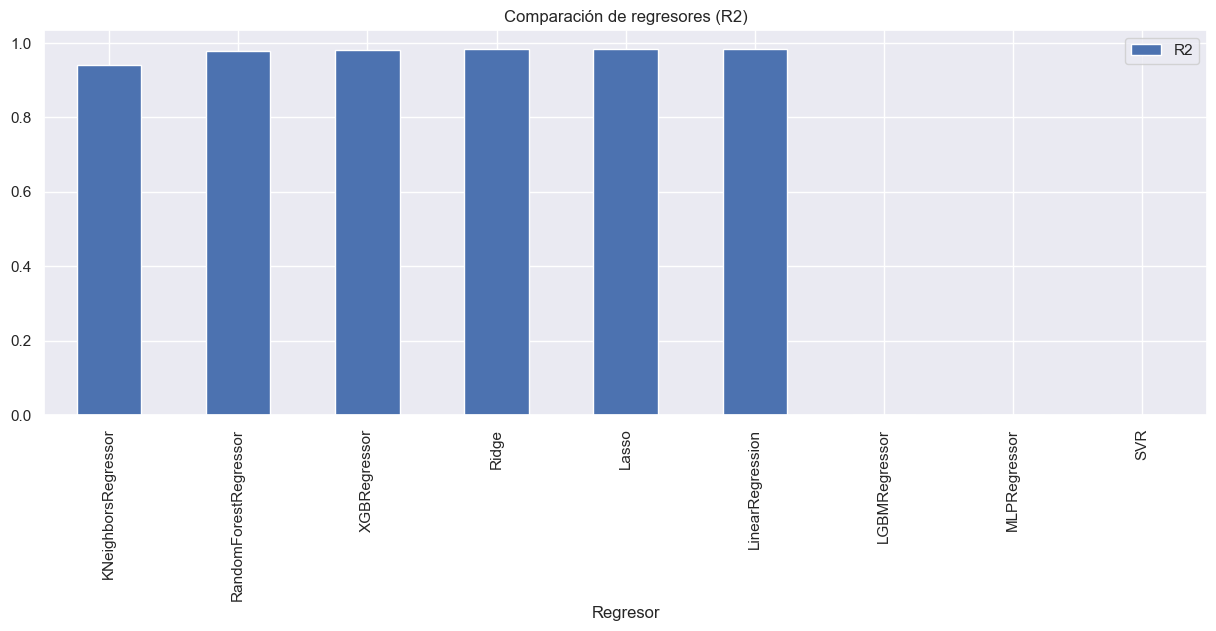

In [36]:
metrics_df1.sort_values('R2')[['Regresor', 'R2']].plot(figsize=(15,5)
                                                                       ,grid=True
                                                                       ,kind='bar'
                                                                       ,x='Regresor'
                                                                       ,title='Comparación de regresores (R2)',
)

In [37]:
metrics_df1.sort_values('MAE')[['Regresor','MAE','MAPE','R2']].style.set_properties(**{'text-align': 'left'})

,Regresor,MAE,MAPE,R2
8,XGBRegressor,35.419357,0.128098,0.981508
3,LinearRegression,35.881556,0.131475,0.984820
1,Lasso,35.882452,0.131478,0.984819
6,Ridge,35.919568,0.131609,0.984777
5,RandomForestRegressor,35.921272,0.129653,0.977451
0,KNeighborsRegressor,43.910515,0.155684,0.940522
7,SVR,83.779201,0.307166,nan
2,LGBMRegressor,86.903157,0.315853,nan
4,MLPRegressor,115.922071,0.416885,nan


* A partir de dos variables - "Neoplasms" (Tumores) y "Lower Respiratory Infections" (Infecciones Respiratorias Bajas):

In [38]:
# Se crea una lista para las métricas
error_metrics=[]

# Se itera sobre la lista de regresores
for regresor in regresores:
    
    # Se entrena el regresor con los conjuntos de training
    regresor.fit(XX_train, YY_train)
    print("-------------",type(regresor).__name__,"----------------")
    print("Training score:",regresor.score(XX_train,YY_train))
    print("Testing score:",regresor.score(XX_test,YY_test))
        
    # Se predice con los valores de XX_test
    y_pred = regresor.predict(XX_test)
    
    # Se calcula error
    error_metrics.append( {
                           'Regresor': type(regresor).__name__, 
                           'MAE': np.sqrt(mean_absolute_error((YY_test),(y_pred))),
                           'R2': np.sqrt(r2_score((YY_test),(y_pred))),
                           'MAPE': np.sqrt(mean_absolute_percentage_error((YY_test),(y_pred)))
                          }
                        )

    
# Se convierte la lista de métricas en un dataframe
metrics_df2 = pd.DataFrame.from_dict(error_metrics)
metrics_df2.head()

------------- KNeighborsRegressor ----------------
Training score: 0.9708788256111152
Testing score: 0.944647330257087
------------- Lasso ----------------
Training score: 0.995785391446619
Testing score: 0.9894359885300577
------------- LGBMRegressor ----------------
Training score: 0.0
Testing score: -0.2543453109655254
------------- LinearRegression ----------------
Training score: 0.9957854117000694
Testing score: 0.9894416929951134


C:\Users\giord\anaconda3updated\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\giord\AppData\Local\Temp\ipykernel_19876\3372685903.py:20: RuntimeWarning: invalid value encountered in sqrt
  'R2': np.sqrt(r2_score((YY_test),(y_pred))),
C:\Users\giord\anaconda3updated\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1617: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


------------- MLPRegressor ----------------
Training score: -25.22447051427645
Testing score: -77.86081230756697


C:\Users\giord\AppData\Local\Temp\ipykernel_19876\3372685903.py:20: RuntimeWarning: invalid value encountered in sqrt
  'R2': np.sqrt(r2_score((YY_test),(y_pred))),
C:\Users\giord\AppData\Local\Temp\ipykernel_19876\3372685903.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regresor.fit(XX_train, YY_train)


------------- RandomForestRegressor ----------------
Training score: 0.9957052460842784
Testing score: 0.9887605306526036
------------- Ridge ----------------
Training score: 0.9957854117000696
Testing score: 0.9894416930305566
------------- SVR ----------------
Training score: 0.18952716429647887
Testing score: -0.17838002636782258
------------- XGBRegressor ----------------
Training score: 0.9999999578672817
Testing score: 0.9689116182275995


C:\Users\giord\anaconda3updated\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\giord\AppData\Local\Temp\ipykernel_19876\3372685903.py:20: RuntimeWarning: invalid value encountered in sqrt
  'R2': np.sqrt(r2_score((YY_test),(y_pred))),


,Regresor,MAE,R2,MAPE
0,KNeighborsRegressor,1.273665,0.971930,0.028390
1,Lasso,0.848905,0.994704,0.018936
2,LGBMRegressor,2.844283,NaN,0.063427
3,LinearRegression,0.848682,0.994707,0.018931
4,MLPRegressor,7.488113,NaN,0.166847


<Axes: title={'center': 'Comparación de regresores (MAE)'}, xlabel='Regresor'>

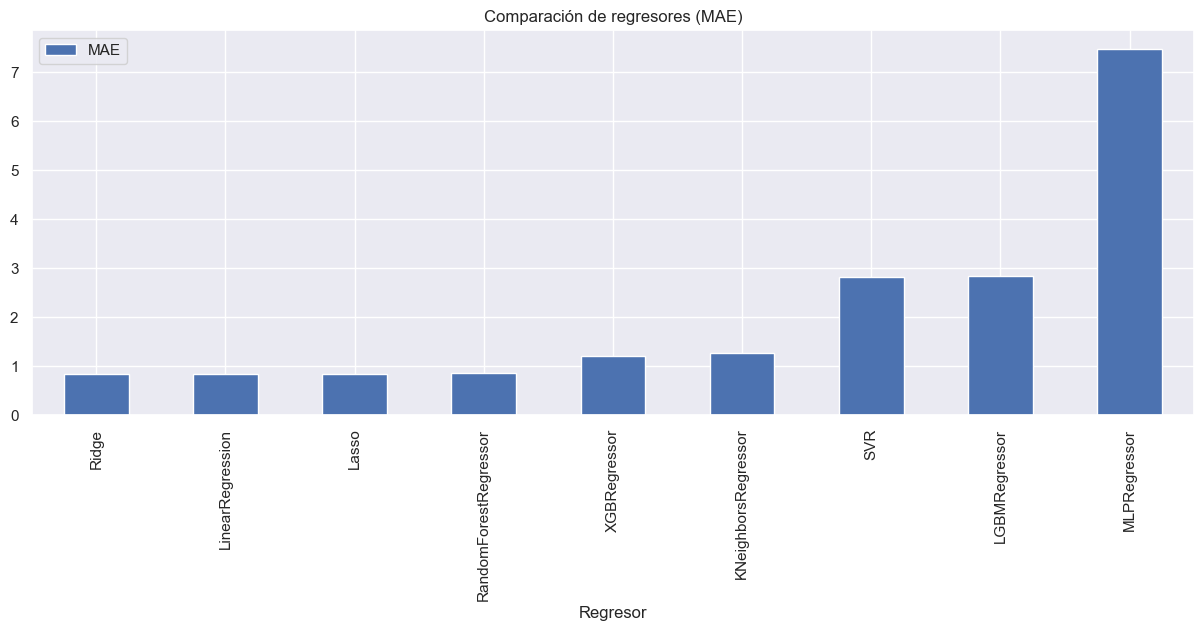

In [39]:
metrics_df2.sort_values('MAE')[['Regresor', 'MAE']].plot(figsize=(15,5)
                                                                       ,grid=True
                                                                       ,kind='bar'
                                                                       ,x='Regresor'
                                                                       ,title='Comparación de regresores (MAE)',
)

<Axes: title={'center': 'Comparación de regresores (MAPE)'}, xlabel='Regresor'>

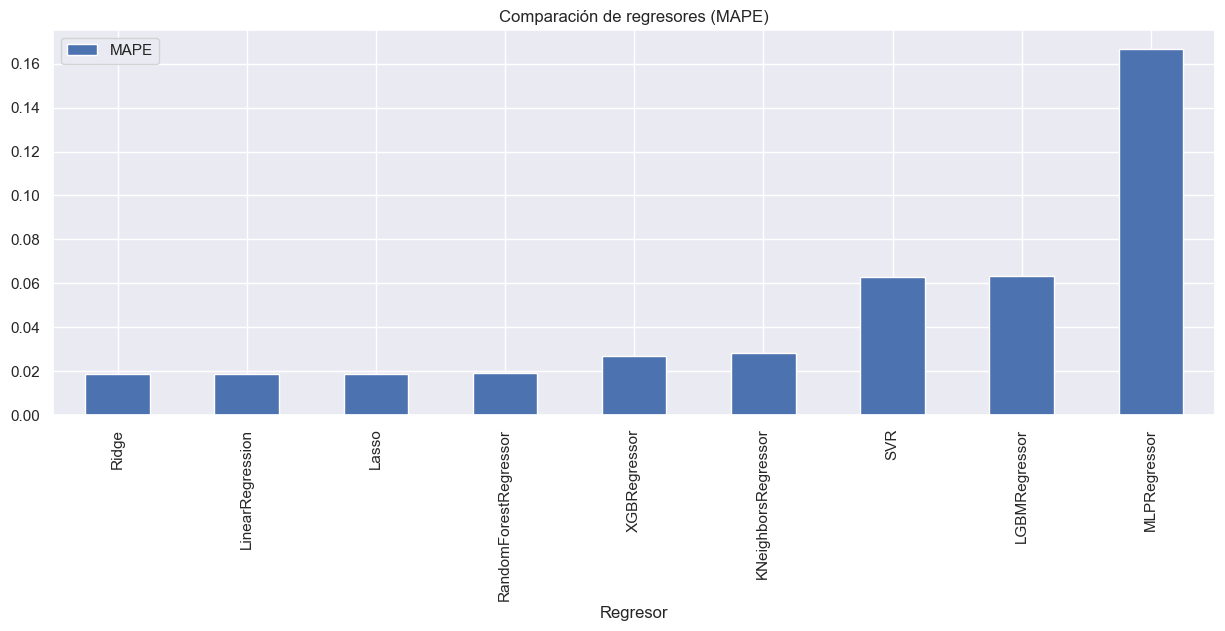

In [40]:
metrics_df2.sort_values('MAPE')[['Regresor', 'MAPE']].plot(figsize=(15,5)
                                                                       ,grid=True
                                                                       ,kind='bar'
                                                                       ,x='Regresor'
                                                                       ,title='Comparación de regresores (MAPE)',
)

<Axes: title={'center': 'Comparación de regresores (R2)'}, xlabel='Regresor'>

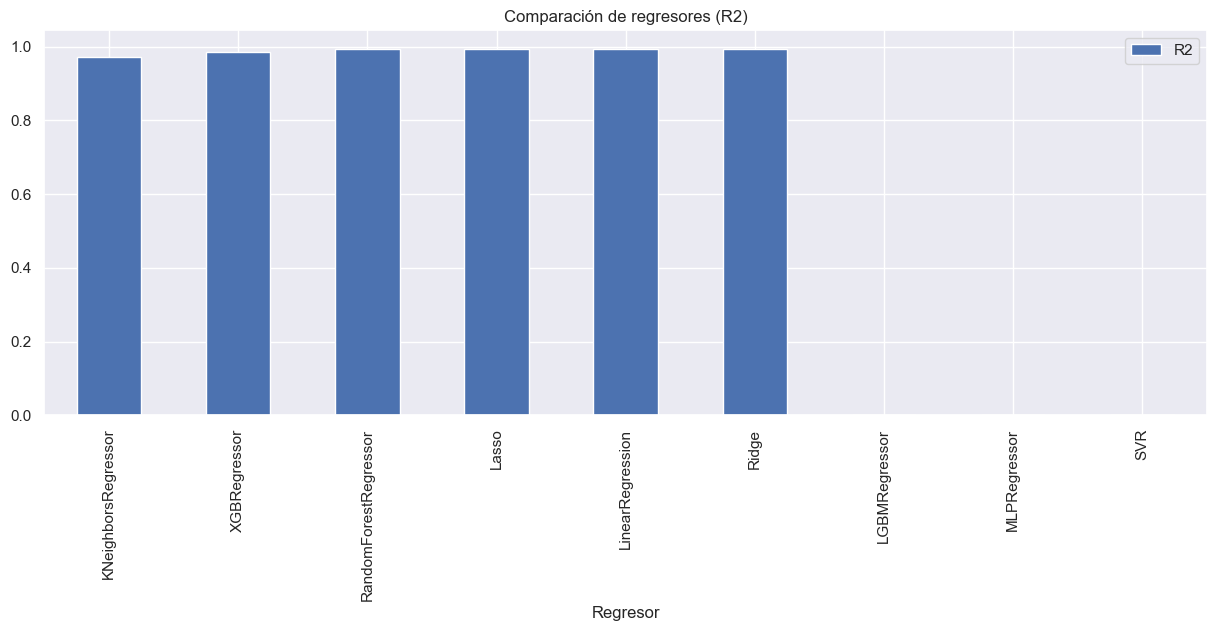

In [41]:
metrics_df2.sort_values('R2')[['Regresor', 'R2']].plot(figsize=(15,5)
                                                                       ,grid=True
                                                                       ,kind='bar'
                                                                       ,x='Regresor'
                                                                       ,title='Comparación de regresores (R2)',
)

In [42]:
metrics_df2.sort_values('MAE')[['Regresor','MAE','MAPE','R2']].style.set_properties(**{'text-align': 'left'})

,Regresor,MAE,MAPE,R2
6,Ridge,0.848682,0.018931,0.994707
3,LinearRegression,0.848682,0.018931,0.994707
1,Lasso,0.848905,0.018936,0.994704
5,RandomForestRegressor,0.853099,0.019040,0.994364
8,XGBRegressor,1.201337,0.026813,0.984333
0,KNeighborsRegressor,1.273665,0.028390,0.971930
7,SVR,2.830391,0.063128,nan
2,LGBMRegressor,2.844283,0.063427,nan
4,MLPRegressor,7.488113,0.166847,nan


* Luego de entrenar y testear varios modelos de regresión se observa que los modelos Ridge, LinearRegression, Lasso y RandomForestRegressor son los que mejores resultados arrojaron y que mejor se ajustaron. Vemos que el Error Absoluto Medio para estos da alrededor de 0.85 (0.853 a 0.848), que el Error Porcentual Absoluto Medio es menor al 0.02%, y que el R2 da 0.99, lo que indica un muy buen ajuste en los modelos, siendo muy fiables para la predicción.

## 8. Overfitting o Underfitting

Al seleccionar sólo los datos de Argentina la muestra se vuelve mucho más pequeña, en este sentido encontramos que puede haber riesgo de Underfitting. Sin embargo, en los modelos donde hemos visto mejores resultados observamos que la performance entre los datos de entrenamiento y los de prueba muestra una diferencia dentro de lo aceptable (menor a 0.01):

#### ------------- Ridge ----------------
#### Training score: 0.9957854117000696
#### Testing score: 0.9894416930305566
#### ------------- LinearRegression ----------------
#### Training score: 0.9957854117000694
#### Testing score: 0.9894416929951134
#### ------------- Lasso ----------------
#### Training score: 0.995785391446619
#### Testing score: 0.9894359885300577
#### ------------- RandomForestRegressor ----------------
#### Training score: 0.9957052460842784
#### Testing score: 0.9887605306526036



> ####  Una posible forma de mejorar el entrenamiento de los modelos sería ampliar la muestra, abarcando por ejemplo no sólo Argentina, sino también el resto de America Latina.

## 9. Respondiendo preguntas con la muestra completa (mundial)

In [43]:
df_sum = df.copy()
df_sum.drop(
    columns=[
        "Code",
        "Year",
        "Country/Territory"
        ],
    inplace=True)
df_sum = df_sum.sum()
df_sum = df_sum.to_frame()
df_sum.reset_index(inplace=True)
df_sum.rename(columns={"index": "cause_of_death", 0: "total_sum"}, inplace=True)
df_sum.sort_values(by="total_sum", ascending=False, inplace=True)
df_sum.head()

,cause_of_death,total_sum
12,Cardiovascular Diseases,447741982
20,Neoplasms,229758538
27,Chronic Respiratory Diseases,104605334
13,Lower Respiratory Infections,83770038
14,Neonatal Disorders,76860729


* Aquí nos preguntamos, ahora a nivel mundial, cuáles son las causas de muerte con mayores víctimas totales.
* Observamos que los primeros cuatro puestos son compartidos con Argentina, con una pequeña diferencia en su orden:

***Argentina:*** 1. Cardiovascular Diseases, 2. Neoplasms, 3. Lower Respiratory Infections, 4. Chronic Respiratory Diseases, 5. Digestive Diseases

***Mundo:*** 1. Cardiovascular Diseases, 2. Neoplasms, 3. Chronic Respiratory Diseases, 4. Lower Respiratory Infections, 5. Neonatal Disorders	

* Continuaremos enfocándonos en los dos primeros puestos (en ambas muestras), ***Cardiovascular Diseases*** y ***Neoplasms***.

## 10. Entrenando los modelos con los datos del mundo

> ### A. Neoplasms (tumores)

In [44]:
# Se vuelve a importar el dataset para empezar de cero
try:
    df = pd.read_csv('https://raw.githubusercontent.com/santiago-giordano/datascienceproject/main/datasets/cause_of_deaths.csv')
except Exception as e:
    logging.exception("Exception occurred", exc_info=True)

In [45]:
# Se crea un df con la sumatoria de casos por año en todo el mundo
df_neo = df[["Code", "Year", "Neoplasms"]]
df_neo_pivot = df_neo.pivot_table(index="Year", aggfunc="sum", values="Neoplasms")
df_neo_pivot.reset_index(inplace=True)
df_neo_pivot

,Year,Neoplasms
0,1990,5752596
1,1991,5867965
2,1992,5996098
3,1993,6167069
4,1994,6296066
5,1995,6402881
6,1996,6490603
7,1997,6586074
8,1998,6703169
9,1999,6857548


In [46]:
# Se entrena el modelo con una variable
x = df_neo_pivot['Year'].values.reshape(-1, 1)
y = df_neo_pivot['Neoplasms'].values.reshape(-1, 1)

In [47]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [48]:
regressor = LinearRegression()
regressor.fit(X_train, Y_train) #Creates model

LinearRegression()

Text(0.5, 0.98, 'Linear Regression Model')

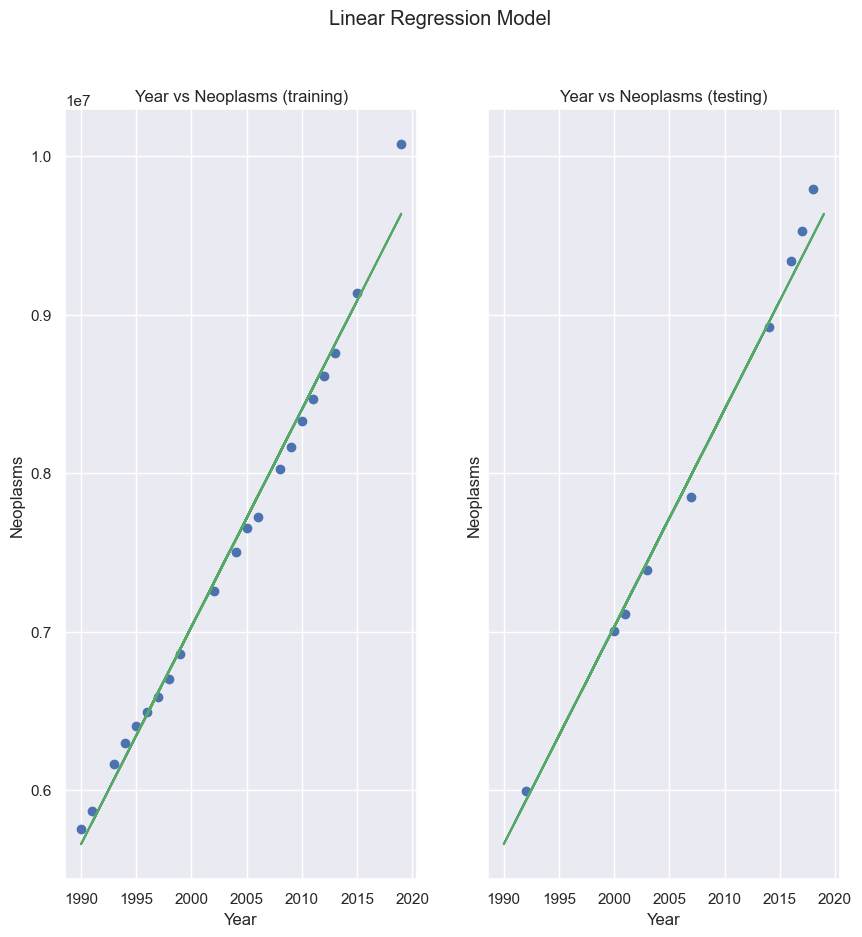

In [49]:
sns.set_theme()
fig, ax = plt.subplots(1, 2, figsize=(10, 10), sharey=True)
ax[0].scatter(X_train, Y_train)
ax[0].plot(X_train, regressor.predict(X_train), c='g')
ax[0].set_title('Year vs Neoplasms (training)')
ax[0].set_xlabel('Year')
ax[0].set_ylabel('Neoplasms')
ax[1].scatter(X_test, Y_test)
ax[1].plot(X_train, regressor.predict(X_train), c='g')
ax[1].set_title('Year vs Neoplasms (testing)')
ax[1].set_xlabel('Year')
ax[1].set_ylabel('Neoplasms')
plt.suptitle('Linear Regression Model')

In [50]:
regressor.score(X_test, Y_test)

0.9889671829561179

### Entrenando varios modelos para compararlos

In [51]:
# Lista con los regresores
regresores = [ 
    KNeighborsRegressor()
    ,Lasso()
    ,LGBMRegressor(objective='regression', linear_tree=True)
    ,LinearRegression()
    ,MLPRegressor(max_iter=600, random_state=170162)
    ,RandomForestRegressor(criterion='absolute_error', random_state=170162) 
    ,Ridge()
    ,SVR(gamma='auto', kernel='rbf') 
    ,XGBRegressor()
    ]

In [52]:
# Se crea una lista para las métricas
error_metrics=[]

# Se itera sobre la lista de regresores
for regresor in regresores:
    
    # Se entrena el regresor con los conjuntos de training
    regresor.fit(X_train, Y_train)
    print("-------------",type(regresor).__name__,"----------------")
    print("Training score:",regresor.score(X_train,Y_train))
    print("Testing score:",regresor.score(X_test,Y_test))
        
    # Se predice con los valores de XX_test
    y_pred = regresor.predict(X_test)
    
    # Se calcula error
    error_metrics.append( {
                           'Regresor': type(regresor).__name__, 
                           'MAE': np.sqrt(mean_absolute_error((Y_test),(y_pred))),
                           'R2': np.sqrt(r2_score((Y_test),(y_pred))),
                           'MAPE': np.sqrt(mean_absolute_percentage_error((Y_test),(y_pred)))
                          }
                        )

    
# Se convierte la lista de métricas en un dataframe
metrics_df3 = pd.DataFrame.from_dict(error_metrics)
metrics_df3.head()

------------- KNeighborsRegressor ----------------
Training score: 0.948612718735441
Testing score: 0.9192570173134867
------------- Lasso ----------------
Training score: 0.9891457571596617
Testing score: 0.9889671692723969
------------- LGBMRegressor ----------------
Training score: 0.0
Testing score: -0.25433543399320047
------------- LinearRegression ----------------
Training score: 0.9891457571596723
Testing score: 0.9889671829561179


C:\Users\giord\anaconda3updated\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\giord\AppData\Local\Temp\ipykernel_19876\570050386.py:20: RuntimeWarning: invalid value encountered in sqrt
  'R2': np.sqrt(r2_score((Y_test),(y_pred))),
C:\Users\giord\anaconda3updated\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1617: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\giord\anaconda3updated\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\giord\AppData\Local\Te

------------- MLPRegressor ----------------
Training score: -41.265440674987836
Testing score: -40.36040215735543
------------- RandomForestRegressor ----------------
Training score: 0.9903304390875763
Testing score: 0.9871958370453274
------------- Ridge ----------------
Training score: 0.9891452894360981
Testing score: 0.9888773696285597
------------- SVR ----------------
Training score: -0.0010087438976567054
Testing score: -0.2259737715080865
------------- XGBRegressor ----------------
Training score: 0.999999999826896
Testing score: 0.959549590815698


C:\Users\giord\anaconda3updated\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\giord\AppData\Local\Temp\ipykernel_19876\570050386.py:20: RuntimeWarning: invalid value encountered in sqrt
  'R2': np.sqrt(r2_score((Y_test),(y_pred))),


,Regresor,MAE,R2,MAPE
0,KNeighborsRegressor,525.818072,0.958779,0.177697
1,Lasso,323.372100,0.994468,0.110560
2,LGBMRegressor,1078.091239,NaN,0.370872
3,LinearRegression,323.372047,0.994468,0.110560
4,MLPRegressor,2828.899373,NaN,0.993615


<Axes: title={'center': 'Comparación de regresores (MAE)'}, xlabel='Regresor'>

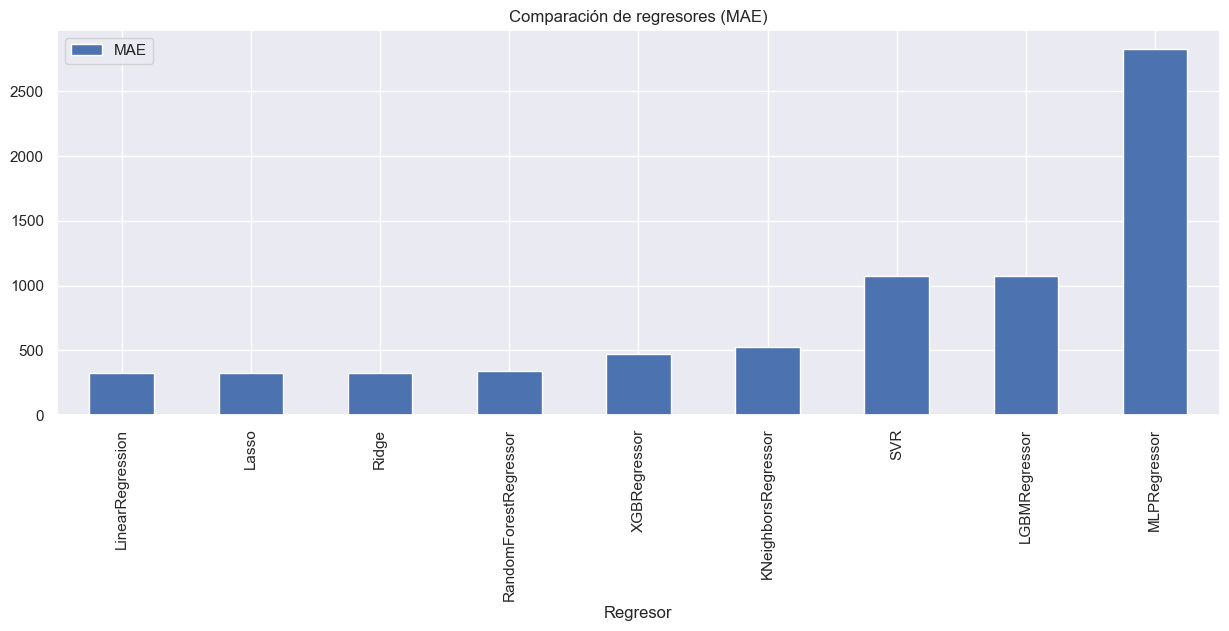

In [53]:
metrics_df3.sort_values('MAE')[['Regresor', 'MAE']].plot(figsize=(15,5)
                                                                       ,grid=True
                                                                       ,kind='bar'
                                                                       ,x='Regresor'
                                                                       ,title='Comparación de regresores (MAE)',
)

<Axes: title={'center': 'Comparación de regresores (MAPE)'}, xlabel='Regresor'>

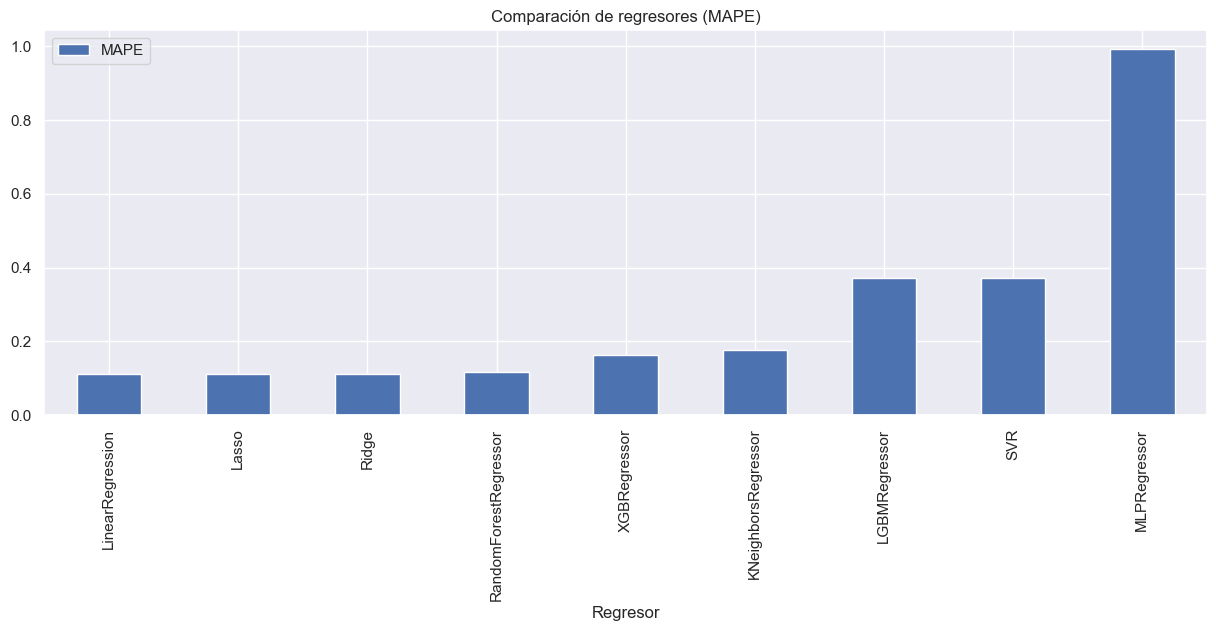

In [54]:
metrics_df3.sort_values('MAPE')[['Regresor', 'MAPE']].plot(figsize=(15,5)
                                                                       ,grid=True
                                                                       ,kind='bar'
                                                                       ,x='Regresor'
                                                                       ,title='Comparación de regresores (MAPE)',
)

<Axes: title={'center': 'Comparación de regresores (R2)'}, xlabel='Regresor'>

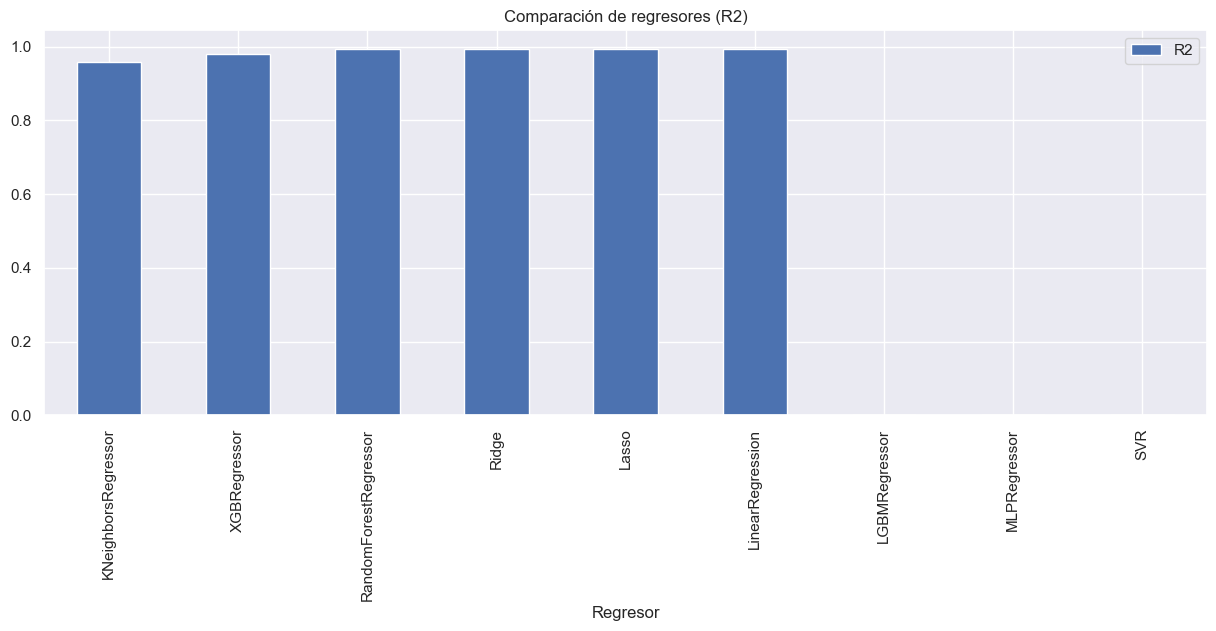

In [55]:
metrics_df3.sort_values('R2')[['Regresor', 'R2']].plot(figsize=(15,5)
                                                                       ,grid=True
                                                                       ,kind='bar'
                                                                       ,x='Regresor'
                                                                       ,title='Comparación de regresores (R2)',
)

In [56]:
metrics_df3.sort_values('MAE')[['Regresor','MAE','MAPE','R2']].style.set_properties(**{'text-align': 'left'})

,Regresor,MAE,MAPE,R2
3,LinearRegression,323.372047,0.110560,0.994468
1,Lasso,323.372100,0.110560,0.994468
6,Ridge,323.715132,0.110634,0.994423
5,RandomForestRegressor,340.494025,0.116327,0.993577
8,XGBRegressor,470.419316,0.162852,0.979566
0,KNeighborsRegressor,525.818072,0.177697,0.958779
7,SVR,1076.210231,0.371046,nan
2,LGBMRegressor,1078.091239,0.370872,nan
4,MLPRegressor,2828.899373,0.993615,nan


* Luego de entrenar y testear varios modelos de regresión sobre la totalidad de los países se observa que los modelos LinearRegression, Lasso, Ridge y RandomForestRegressor nuevamente arrojan los mejores resultados.

> ### B. Cardiovascular Diseases

In [57]:
# Se crea un df con la sumatoria de casos por año en todo el mundo
df_car = df[["Code", "Year", "Cardiovascular Diseases"]]
df_car_pivot = df_car.pivot_table(index="Year", aggfunc="sum", values="Cardiovascular Diseases")
df_car_pivot.reset_index(inplace=True)
df_car_pivot

,Year,Cardiovascular Diseases
0,1990,12062179
1,1991,12220282
2,1992,12437979
3,1993,12802108
4,1994,13026289
5,1995,13129252
6,1996,13213565
7,1997,13339902
8,1998,13461489
9,1999,13720763


In [58]:
# Se entrena el modelo con una variable
x = df_car_pivot['Year'].values.reshape(-1, 1)
y = df_car_pivot['Cardiovascular Diseases'].values.reshape(-1, 1)
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.3, random_state=0)
regressor = LinearRegression()
regressor.fit(X_train, Y_train) #Creates model

LinearRegression()

Text(0.5, 0.98, 'Linear Regression Model')

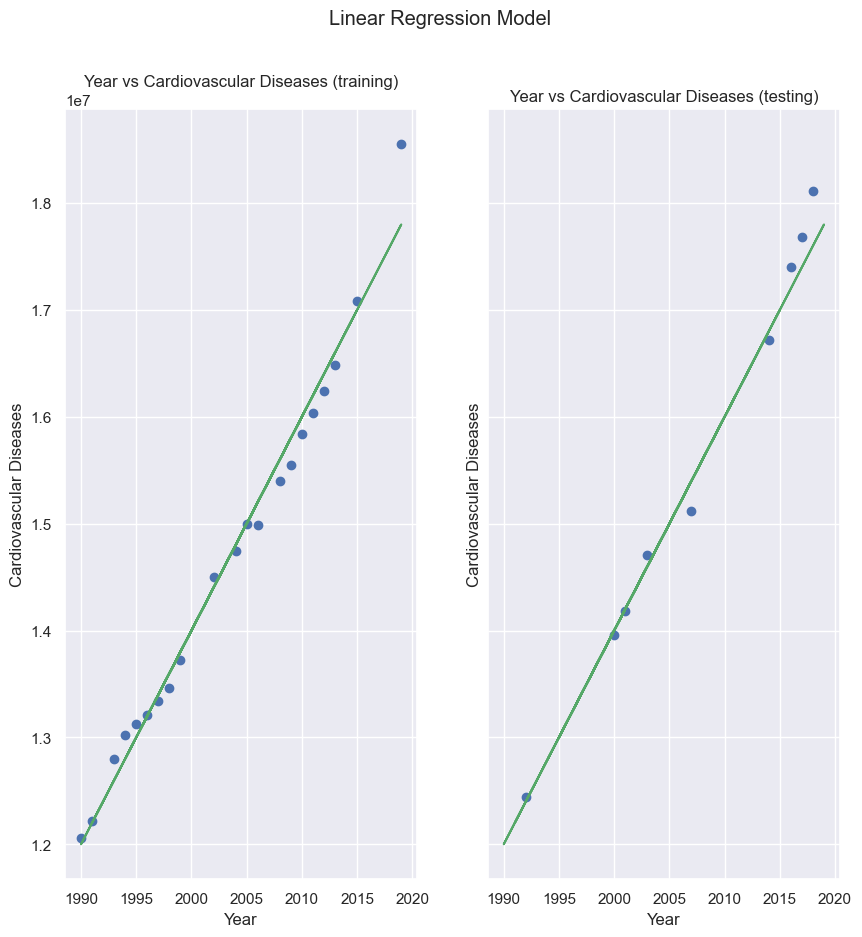

In [59]:
sns.set_theme()
fig, ax = plt.subplots(1, 2, figsize=(10, 10), sharey=True)
ax[0].scatter(X_train, Y_train)
ax[0].plot(X_train, regressor.predict(X_train), c='g')
ax[0].set_title('Year vs Cardiovascular Diseases (training)')
ax[0].set_xlabel('Year')
ax[0].set_ylabel('Cardiovascular Diseases')
ax[1].scatter(X_test, Y_test)
ax[1].plot(X_train, regressor.predict(X_train), c='g')
ax[1].set_title('Year vs Cardiovascular Diseases (testing)')
ax[1].set_xlabel('Year')
ax[1].set_ylabel('Cardiovascular Diseases')
plt.suptitle('Linear Regression Model')

In [60]:
regressor.score(X_test, Y_test)

0.9842634178831653

* Tanto para ***Neoplasms*** como para ***Cardiovascular Diseases*** el score supera los 0,98.

## 11. Google Trends API

Usaremos la API de Google Trends para comparar la "popularidad" de algunos de estos resultados. Debemos tener en cuenta que el período al que accedemos con esta API es sólo de 2018 a 2023, y por lo tanto no podemos llevar a cabo una comparación directa a través de los 30 años que abarca la muestra del dataset. Será una comparación más bien ilustrativa, donde veremos sólo algunas tendencias, sin buscar correlaciones fuertes. Otro detalle a tener en cuenta es la pandemia de Coronavirus, que desde el 2020 ha tenido un impacto significativo sobre la salud mundial. A pesar de que en el año 2023 ya ha decrecido bastante su incidencia, probablemente encontremos su huella entre los años 2020 y 2022 principalmente.

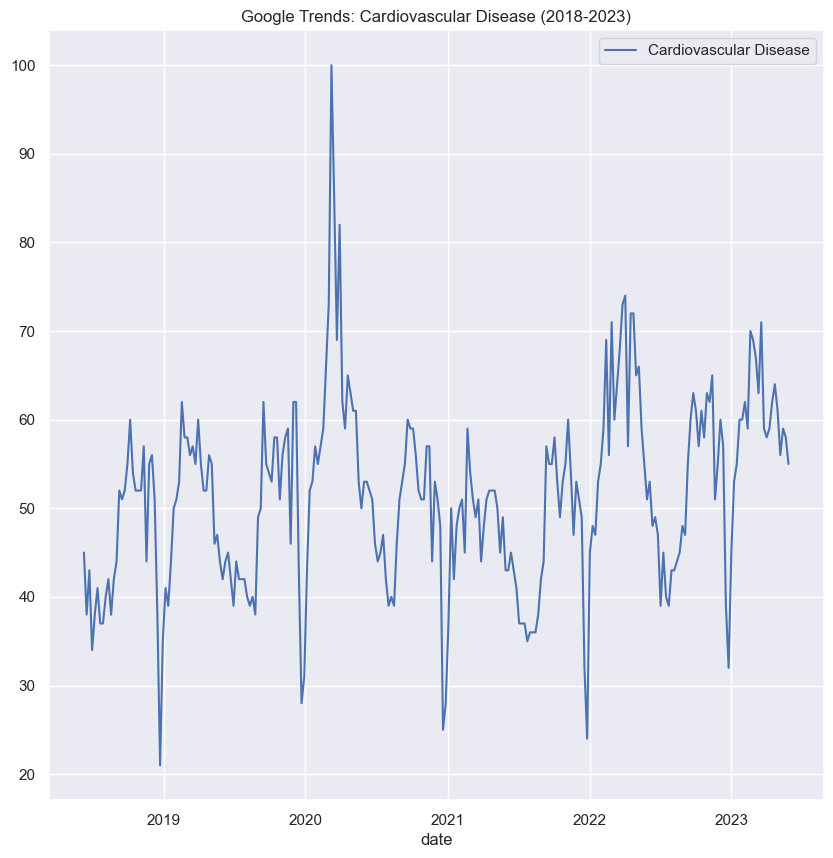

In [61]:
# Connect to the Google Trends API
pytrend = TrendReq()

# Set the keyword to search for
keyword = 'Cardiovascular Disease'

# Get data about the popularity of the keyword over time
pytrend.build_payload(kw_list=[keyword])
trend_data = pytrend.interest_over_time()

trend_car_df = pd.DataFrame(trend_data)
trend_car_df.drop(columns=["isPartial"], inplace=True)

sns.lineplot(data=trend_car_df, markers=False, dashes=False)
plt.title('Google Trends: Cardiovascular Disease (2018-2023)')
plt.show()

> No hay una tendencia significativa ni positiva ni negativa, sin embargo resulta llamativa la suba ligada a los primeros meses del 2020.

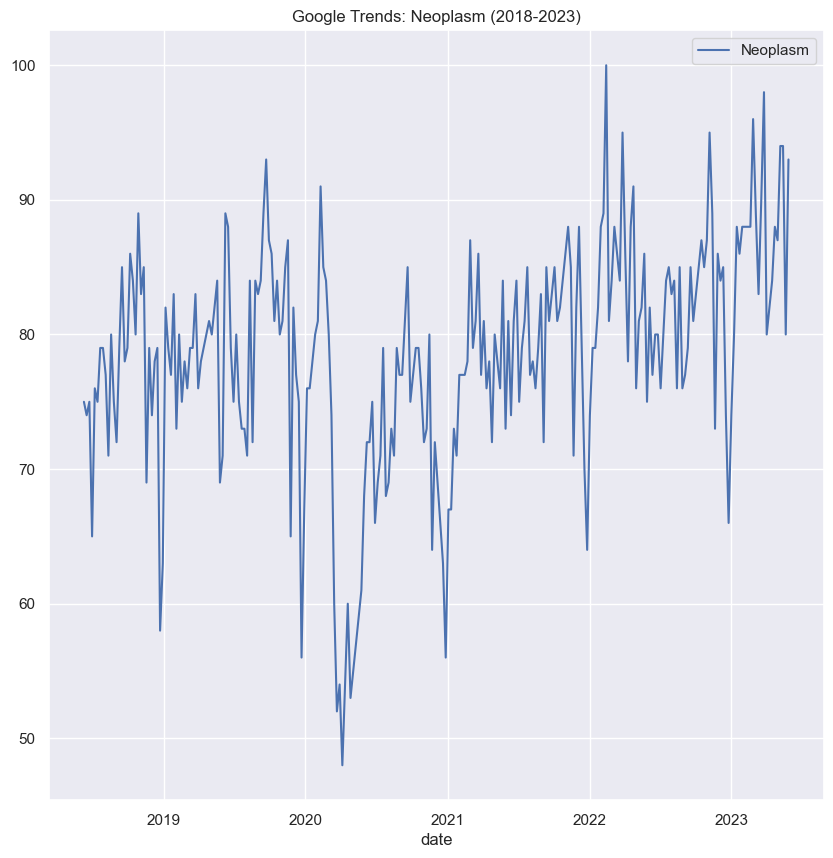

In [62]:
# Connect to the Google Trends API
pytrend = TrendReq()

# Set the keyword to search for
keyword = 'Neoplasm'

# Get data about the popularity of the keyword over time
pytrend.build_payload(kw_list=[keyword])
trend_data = pytrend.interest_over_time()

trend_car_df = pd.DataFrame(trend_data)
trend_car_df.drop(columns=["isPartial"], inplace=True)

sns.lineplot(data=trend_car_df, markers=False, dashes=False)
plt.title('Google Trends: Neoplasm (2018-2023)')
plt.show()

> No hay una tendencia significativa ni positiva ni negativa, sin embargo resulta llamativa la baja ligada a los primeros meses del 2020.

* En ambos casos los resultados muestran alteraciones (positivas o negativas) en los primeros meses del 2020, época donde comenzó la pandemia.

#### Al menos en este recorte temporal que nos ofrece la API, tentativamente podríamos interpretar que la "conciencia social" mundial no coincide con la gravedad que observamos en la cantidad de muertes por enfermedad cardiovascular y tumores.

#### En conclusión, tanto por el estado de la "conciencia social" como por el hecho concreto de la cantidad de víctimas que estas enfermedades se cobran, resulta de suma importancia pensar estrategias para combatir este problema de Salud Pública.

## 12. Buscando predecir la evolución futura de "Neoplasms" y "Cardiovascular Diseases" a nivel mundial

In [63]:
df_cn = pd.merge(df_car_pivot, df_neo_pivot, how ='left', on ='Year')
df_cn

,Year,Cardiovascular Diseases,Neoplasms
0,1990,12062179,5752596
1,1991,12220282,5867965
2,1992,12437979,5996098
3,1993,12802108,6167069
4,1994,13026289,6296066
5,1995,13129252,6402881
6,1996,13213565,6490603
7,1997,13339902,6586074
8,1998,13461489,6703169
9,1999,13720763,6857548


[Text(0, 0.5, 'Neoplasms')]

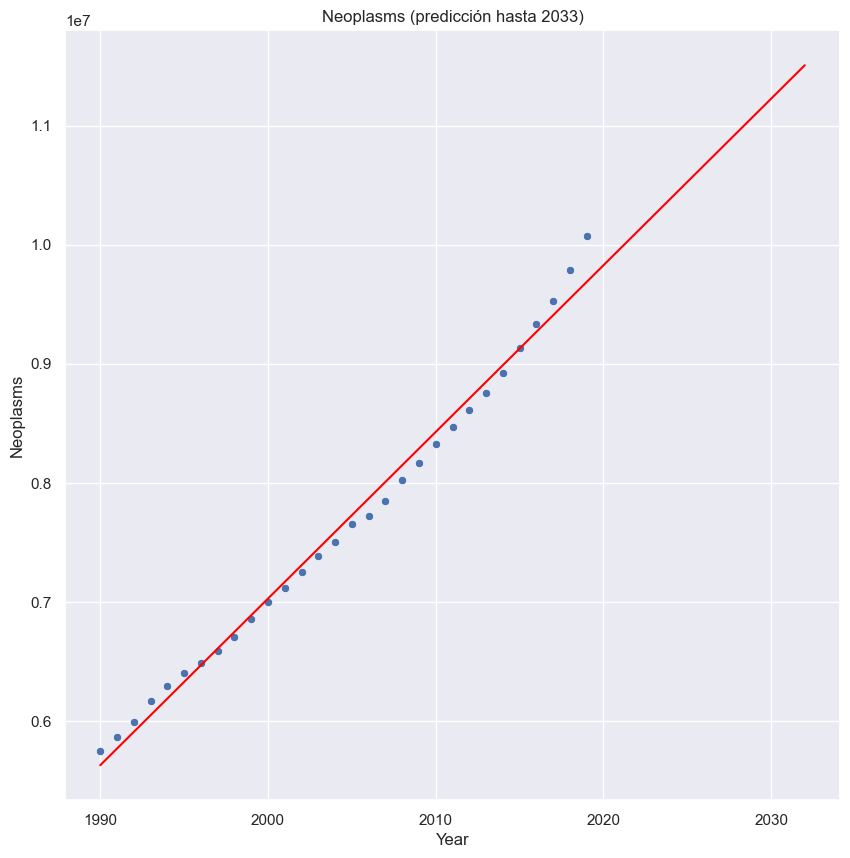

In [64]:
from scipy.stats import linregress

# fit linear model
slope, intercept, r_value, p_value, std_err = linregress(df_cn["Year"], df_cn["Neoplasms"])

# plot result
f, ax = plt.subplots()
sns.scatterplot(x="Year", y="Neoplasms", ax=ax, data=df_cn)
ax.plot(range(1990, 2033), [i*slope + intercept for i in range(1990, 2033)], color="red")
ax.set_title("Neoplasms (predicción hasta 2033)")
ax.set(ylabel="Neoplasms")

[Text(0, 0.5, 'Cardiovascular Diseases')]

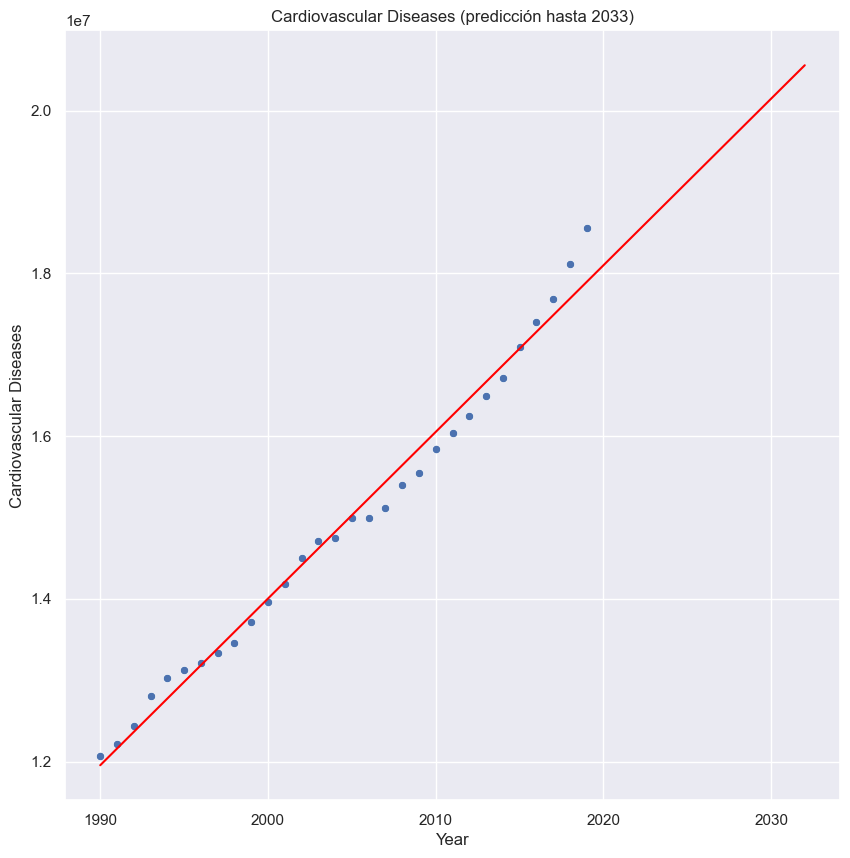

In [65]:
# fit linear model
slope, intercept, r_value, p_value, std_err = linregress(df_cn["Year"], df_cn["Cardiovascular Diseases"])

# plot result
f, ax = plt.subplots()
sns.scatterplot(x="Year", y="Cardiovascular Diseases", ax=ax, data=df_cn)
ax.plot(range(1990, 2033), [i*slope + intercept for i in range(1990, 2033)], color="red")
ax.set_title("Cardiovascular Diseases (predicción hasta 2033)")
ax.set(ylabel="Cardiovascular Diseases")

## 13. Optimización y selección de modelos

In [66]:
df_cn.head()

,Year,Cardiovascular Diseases,Neoplasms
0,1990,12062179,5752596
1,1991,12220282,5867965
2,1992,12437979,5996098
3,1993,12802108,6167069
4,1994,13026289,6296066


In [69]:
# Target variable 
y = df_cn.Year
y.head()

0    1990
1    1991
2    1992
3    1993
4    1994
Name: Year, dtype: int64

In [70]:
# Input data
df_cn = df_cn.drop(columns=['Year'])
X = df_cn.copy()
X.head()

,Cardiovascular Diseases,Neoplasms
0,12062179,5752596
1,12220282,5867965
2,12437979,5996098
3,12802108,6167069
4,13026289,6296066


In [71]:
print("Shape of input data: {} and shape of target variable: {}".format(X.shape, y.shape))

Shape of input data: (30, 2) and shape of target variable: (30,)


#### Model Score Using KFold

In [72]:
# Lets split the data into 5 folds.  
# We will use this 'kf'(KFold splitting stratergy) object as input to cross_val_score() method
kf =KFold(n_splits=5, shuffle=True, random_state=42)

cnt = 1
# split()  method generate indices to split data into training and test set.
for train_index, test_index in kf.split(X, y):
    print(f'Fold:{cnt}, Train set: {len(train_index)}, Test set:{len(test_index)}')
    cnt += 1

Fold:1, Train set: 24, Test set:6
Fold:2, Train set: 24, Test set:6
Fold:3, Train set: 24, Test set:6
Fold:4, Train set: 24, Test set:6
Fold:5, Train set: 24, Test set:6


In [73]:
def rmse(score):
    rmse = np.sqrt(-score)
    print(f'rmse= {"{:.2f}".format(rmse)}')

In [76]:
# Using Linear Regression 
score = cross_val_score(linear_model.LinearRegression(), X, y, cv= kf, scoring="neg_mean_squared_error")
print(f'Scores for each fold: {score}')
rmse(score.mean())

Scores for each fold: [-0.39567835 -0.99188801 -1.24630268 -1.74672222 -0.23479619]
rmse= 0.96


In [77]:
# Using Decision Tree Regressor
score = cross_val_score(tree.DecisionTreeRegressor(random_state= 42), X, y, cv=kf, scoring="neg_mean_squared_error")
print(f'Scores for each fold: {score}')
rmse(score.mean())

Scores for each fold: [-1. -1. -1. -1. -1.]
rmse= 1.00


In [78]:
# Using Random Forest Regressor
score = cross_val_score(ensemble.RandomForestRegressor(random_state= 42), X, y, cv= kf, scoring="neg_mean_squared_error")
print(f'Scores for each fold are: {score}')
rmse(score.mean())

Scores for each fold are: [-0.36183333 -1.11388333 -0.33566667 -0.94668333 -0.6522    ]
rmse= 0.83


#### Model Tuning using KFold

In [79]:
# Decision Tree Regressor Tuning 
max_depth = [1,2,3,4,5,6,7,8,9,10]

for val in max_depth:
    score = cross_val_score(tree.DecisionTreeRegressor(max_depth= val, random_state= 42), X, y, cv= kf, scoring="neg_mean_squared_error")
    print(f'For max depth: {val}')
    rmse(score.mean())

For max depth: 1
rmse= 4.61
For max depth: 2
rmse= 2.71
For max depth: 3
rmse= 1.76
For max depth: 4
rmse= 1.21
For max depth: 5
rmse= 1.00
For max depth: 6
rmse= 1.00
For max depth: 7
rmse= 1.00
For max depth: 8
rmse= 1.00
For max depth: 9
rmse= 1.00
For max depth: 10
rmse= 1.00


In [80]:
# Random Forest Regressor Tuning
estimators = [50, 100, 150, 200, 250, 300, 350]

for count in estimators:
    score = cross_val_score(ensemble.RandomForestRegressor(n_estimators= count, random_state= 42), X, y, cv= kf, scoring="neg_mean_squared_error")
    print(f'For estimators: {count}')
    rmse(score.mean())

For estimators: 50
rmse= 0.87
For estimators: 100
rmse= 0.83
For estimators: 150
rmse= 0.78
For estimators: 200
rmse= 0.78
For estimators: 250
rmse= 0.77
For estimators: 300
rmse= 0.76
For estimators: 350
rmse= 0.76


## 14. Conclusiones

### Tal como venimos observando desde la sección 7 de esta investigación, el modelo de regresión linear es el que nos parece que funciona mejor, tanto en la muestra de Argentina como en la mundial. 
### Logra, en las diversas pruebas, valores superiores a 0.96. 
### Por esta razón, consideramos que en caso de proseguir esta investigación en una siguiente instancia, eligiríamos el modelo de regresión linear para continuar y profundizar el estudio.

In [67]:
logging.info("Cierre del log!")